# STRATHMORE DATATHON CHALLENGE  

#### PROBLEM STATEMENT 
Bundas is a supermarket that has stores all over the country.Bundas has collected sales data for over 1000 products across its stores. ​Bundas has hired you as a data scientist to build a predictive model to find out the sales of each product at a particular store.  
Bundas plans on using this model to understand the properties of products and stores that play a paramount role in increasing sales

#### import libraries

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import datetime as dt
from scipy import stats
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os
import gc 
import pandas_profiling

##### Styles and aesthetics for the graphs 

In [2]:
#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

##### Load Data

In [4]:
#Read dataset
home_folder = '/Users/anthonymiyoro/Documents/code/DataTho/data/'

#Read dataset
train_bundas = pd.read_csv(home_folder + 'bundas_train.csv')
test_bundas = pd.read_csv(home_folder + 'bundas_test.csv')

##### Data dimension

In [5]:
# Check The Shape Of The Data Loaded
print('Train bundas shape: {} Rows, {} Columns'.format(*train_bundas.shape))
print('Test bundas shape: {} Rows, {} Columns'.format(*test_bundas.shape))

Train bundas shape: 8523 Rows, 12 Columns
Test bundas shape: 5681 Rows, 11 Columns


##### First five rows of Data

In [6]:
# Print First Few Rows Of The Data
display("train bundas")
display(train_bundas.head(5))
display("test bundas")
display(test_bundas.head(5))

'train bundas'

Item_ID  Weight FatContent  Visibility               Category  Max_Price  \
0   FDA15    9.30    Low Fat        0.02                  Dairy     249.81   
1   DRC01    5.92    Regular        0.02            Soft Drinks      48.27   
2   FDN15   17.50    Low Fat        0.02                   Meat     141.62   
3   FDX07   19.20    Regular        0.00  Fruits and Vegetables     182.09   
4   NCD19    8.93    Low Fat        0.00              Household      53.86   

  Store_ID  Store_Establishment_Year Store_Size Store_Location_Type  \
0   OUT049                      1999     Medium              Tier 1   
1   OUT018                      2009     Medium              Tier 3   
2   OUT049                      1999     Medium              Tier 1   
3   OUT010                      1998        NaN              Tier 3   
4   OUT013                      1987       High              Tier 3   

          Store_Type  Item_Store_Sales  
0  Supermarket Type1          3,735.14  
1  Supermarket Type2            443.42  
2  Supermarket Type1          2,097.27  
3      Grocery Store            732.38  
4  Supermarket Type1            994.71

'test bundas'

Item_ID  Weight FatContent  Visibility     Category  Max_Price Store_ID  \
0   FDW58   20.75    Low Fat        0.01  Snack Foods     107.86   OUT049   
1   FDW14    8.30        reg        0.04        Dairy      87.32   OUT017   
2   NCN55   14.60    Low Fat        0.10       Others     241.75   OUT010   
3   FDQ58    7.32    Low Fat        0.02  Snack Foods     155.03   OUT017   
4   FDY38     nan    Regular        0.12        Dairy     234.23   OUT027   

   Store_Establishment_Year Store_Size Store_Location_Type         Store_Type  
0                      1999     Medium              Tier 1  Supermarket Type1  
1                      2007        NaN              Tier 2  Supermarket Type1  
2                      1998        NaN              Tier 3      Grocery Store  
3                      2007        NaN              Tier 2  Supermarket Type1  
4                      1985     Medium              Tier 3  Supermarket Type3

##### Description of the data

In [7]:
train_bundas.describe()

Weight  Visibility  Max_Price  Store_Establishment_Year  \
count 7,060.00    8,523.00   8,523.00                  8,523.00   
mean     12.86        0.07     140.99                  1,997.83   
std       4.64        0.05      62.28                      8.37   
min       4.55        0.00      31.29                  1,985.00   
25%       8.77        0.03      93.83                  1,987.00   
50%      12.60        0.05     143.01                  1,999.00   
75%      16.85        0.09     185.64                  2,004.00   
max      21.35        0.33     266.89                  2,009.00   

       Item_Store_Sales  
count          8,523.00  
mean           2,181.29  
std            1,706.50  
min               33.29  
25%              834.25  
50%            1,794.33  
75%            3,101.30  
max           13,086.96

In [8]:
test_bundas.describe()

Weight  Visibility  Max_Price  Store_Establishment_Year
count 4,705.00    5,681.00   5,681.00                  5,681.00
mean     12.70        0.07     141.02                  1,997.83
std       4.66        0.05      61.81                      8.37
min       4.55        0.00      31.99                  1,985.00
25%       8.64        0.03      94.41                  1,987.00
50%      12.50        0.05     141.42                  1,999.00
75%      16.70        0.09     186.03                  2,004.00
max      21.35        0.32     266.59                  2,009.00

##### Structure of the data

Use pandas profiling to get summary details of each dataset


In [9]:
import pandas_profiling

An html file will be create in the output folder, it will have the summary of the dataset 


In [31]:
output_folder = '/Users/anthonymiyoro/Documents/code/DataTho/notebook_outputs/'

profile = pandas_profiling.ProfileReport(train_bundas)
profile.to_file(output_file= (output_folder + 'bundas_train.htm'))

profile = pandas_profiling.ProfileReport(test_bundas)
profile.to_file(output_file=(output_folder + 'bundas_test.htm'))

In [10]:
##### Variable names of the data 

display("train bundas")
display(train_bundas.columns)
display("test bundas")
display(test_bundas.columns)

'train bundas'

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Item_Store_Sales'],
      dtype='object')

'test bundas'

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type'],
      dtype='object')

In [11]:

##### type of columns 

# Number of each type of column
display("train bundas")
display(train_bundas.dtypes.value_counts())
display("test bundas")
display(test_bundas.dtypes.value_counts())

'train bundas'

object     7
float64    4
int64      1
dtype: int64

'test bundas'

object     7
float64    3
int64      1
dtype: int64

In [12]:

train_bundas.dtypes

Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
Item_Store_Sales            float64
dtype: object

In [13]:

test_bundas.dtypes

Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
dtype: object

## Data exploration 


### Explore each feature of the dataframe idividually 

##### The first step, before fitting a model is to look at how the independent parameters affect the dependent parameters. 

##### In our case of fitting a model to help determine the sales amount we found it important to appreciate that these same parameters not only affect the amount of sales but the frequency, for this reason we look at how each of the parameters affects the frequency of the item sold and then look at how each of the parameters affects the sales amount.


### Item_ID

In [14]:
train_bundas['Item_ID'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [15]:
train_bundas.Item_ID.unique() 

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
train_bundas["Item_ID"].value_counts()

FDG33    10
FDW13    10
NCL31     9
NCF42     9
FDF52     9
         ..
DRF48     1
FDE52     1
FDN52     1
FDO33     1
FDC23     1
Name: Item_ID, Length: 1559, dtype: int64

In [17]:
train_bundas["Item_ID"].value_counts().mean()

5.466966003848621

###### Items with the ID FDW13 and FDG33  had the highest number of sales, 10 and the least for 9 items was 1 sale ,On average each item was sold 5 times

### weight

In [18]:
train_bundas["Weight"].mean()

12.857645184136183

In [19]:
train_bundas["Weight"].max()

21.35

In [20]:
train_bundas["Weight"].min()

4.555

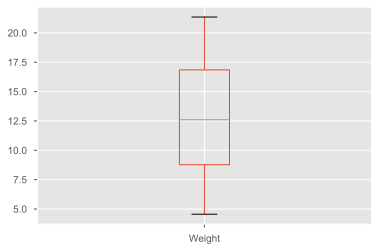

In [21]:
train_bundas.boxplot(column="Weight")  # Plot a single column

###### 1. the average weight of the products sold is 12.87
###### 2. the maximun weight of the products sold is 21.35
###### 3. the minimum weight of the products sold is 4.55

###### From the boxplot we can see the medium weight is around 12.5, there's no outliers, the data is evenly spread out 

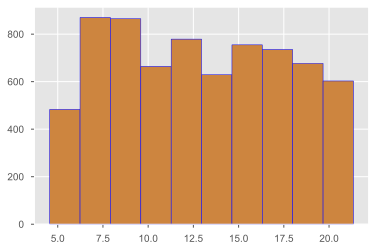

In [22]:
plt.hist(train_bundas['Weight'],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()

###### From this plot we can see that the weight of the items are distributed pretty equally.


### Fat content

In [23]:
train_bundas['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

###### from the looking at the above category, there is an error in recording the Fat Cotent, as they are seen to center around Low Fat and Regular low fat,LF should be Low Fat and reg should be Regular

In [24]:
train_bundas.loc[train_bundas['FatContent'] == 'LF', 'FatContent'] = 'Low Fat'
train_bundas.loc[train_bundas['FatContent'] == 'reg', 'FatContent'] = 'Regular'
train_bundas.loc[train_bundas['FatContent'] == 'low fat', 'FatContent'] = 'Low Fat'

In [25]:
train_bundas['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [26]:
train_bundas["FatContent"].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

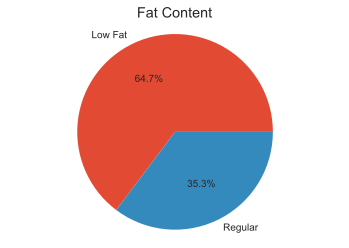

In [27]:
import matplotlib.pyplot as plt

FAT = [5517,3006]

my_labels = 'Low Fat','Regular'
plt.pie(FAT,labels=my_labels,autopct='%1.1f%%')
plt.title('Fat Content')
plt.axis('equal')
plt.show()

###### It can be observed that the items with low fat content are the items mostly sold.

### Category

In [28]:
train_bundas['Category'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
train_bundas["Category"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Category, dtype: int64

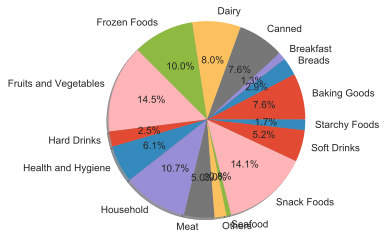

In [30]:
labels = train_bundas['Category'].astype('category').cat.categories.tolist()
counts = train_bundas['Category'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###### Fruits and vegetable and Snack Foods have the highest number of items sold Seafood is the least sold item. It would have been expected that breakfast, bread and dairy to have the higher percentage.

### Store Establishment Year

In [31]:

train_bundas['Store_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [32]:
train_bundas["Store_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Store_Establishment_Year, dtype: int64

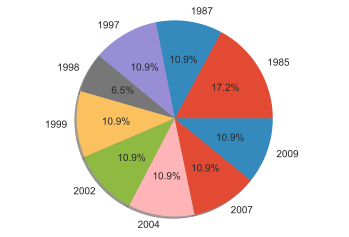

In [33]:
labels = train_bundas['Store_Establishment_Year'].astype('category').cat.categories.tolist()
counts = train_bundas['Store_Establishment_Year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###### The store established in 1985 has the highest while the store established in 1998 has the least item sales.  It can also be observed that the other shops have an approximate equal percentage. This indicates that the early stores are more frequented.

### Store_Size

In [34]:
train_bundas['Store_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [35]:
train_bundas["Store_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Store_Size, dtype: int64

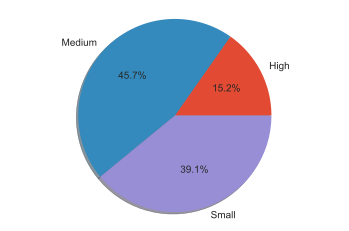

In [36]:
labels = train_bundas['Store_Size'].astype('category').cat.categories.tolist()
counts = train_bundas['Store_Size'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###### The medium sized stores are seen to have the greatest item sales. It can be argued out that the bigger the size the less items sold



### Store_Location_Type

In [37]:
train_bundas['Store_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [38]:
train_bundas["Store_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Store_Location_Type, dtype: int64

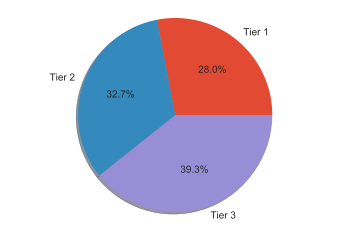

In [39]:
labels = train_bundas['Store_Location_Type'].astype('category').cat.categories.tolist()
counts = train_bundas['Store_Location_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()



###### Tier 3 location has the highest item sales, it can also be observed that the three almost equally share the same percentage an indication that the store type has little influence on the number of items sold

### Store_Type

In [40]:
train_bundas['Store_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [41]:
train_bundas["Store_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Store_Type, dtype: int64

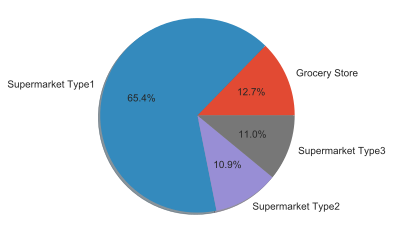

In [42]:
labels = train_bundas['Store_Type'].astype('category').cat.categories.tolist()
counts = train_bundas['Store_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###### Supermarket type1 has the highest items sold, followed by grocery store, then Supermarket type3 and Supermarket type2 has the least

###### it can be conclude that the store type has an influence on the number of items sold

### Sales 

In [43]:
print('Highest Sales amount is:', train_bundas['Item_Store_Sales'].max())
print('Lowest Sales amount is:', train_bundas['Item_Store_Sales'].min())
print('Average Sales amount is:', train_bundas['Item_Store_Sales'].mean())
print('Median Sales amount is:', train_bundas['Item_Store_Sales'].median())

Highest Sales amount is: 13086.9648
Lowest Sales amount is: 33.29
Average Sales amount is: 2181.2889135750365
Median Sales amount is: 1794.3310000000001


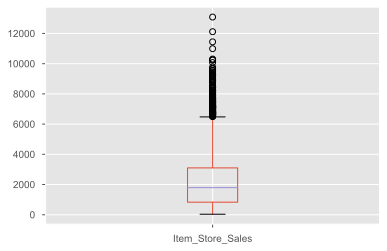

In [44]:
train_bundas.boxplot(column="Item_Store_Sales")  # Plot a single column

###### 1. Highest Sales amount is: 13086.9648
###### 2. Lowest Sales amount is: 33.29
###### 3. Average Sales amount is: 2181.2889135750365
###### 4. Median Sales amount is: 1794.331
###### From the boxplot above the median value is almost the same has the value of the mean, there's no skewness, the values of sales are evenly distributed. 
###### so we have outliers that means some of the sales values were too high compare to the values repeated in the dataset  

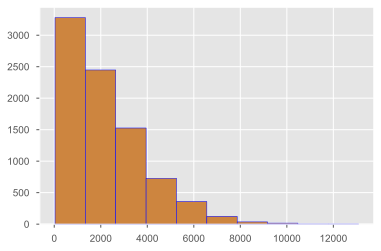

In [45]:
plt.hist(train_bundas['Item_Store_Sales'],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()

###### there's a right  skew distribution

###### A continuation on the explanation of the outliers, this is expected as it indicates that the items with this high sales amount are rarely sold

### Store_ID

In [46]:
train_bundas['Store_ID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [47]:
train_bundas["Store_ID"].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Store_ID, dtype: int64

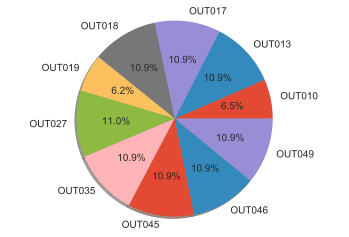

In [48]:
labels = train_bundas['Store_ID'].astype('category').cat.categories.tolist()
counts = train_bundas['Store_ID'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###### It can be observed that almost all the shops sold the same no of items apart  from OUT019 AND OUT010 which both sold significantly less products.

### Visibility

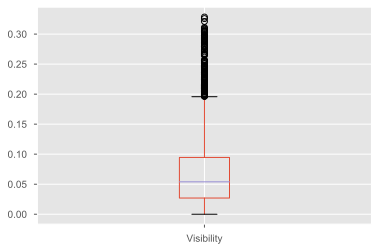

In [49]:
train_bundas.boxplot(column="Visibility")  # Plot a single column

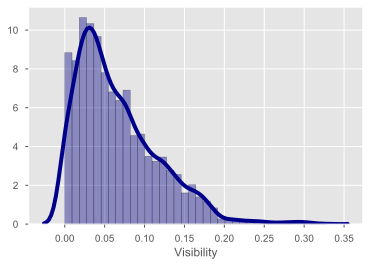

In [50]:
#Density Plot and Histogram of all arrival delays
sns.distplot(train_bundas['Visibility'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

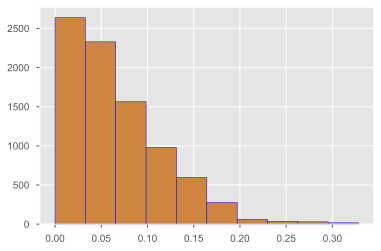

In [51]:
plt.hist(train_bundas['Visibility'],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()

In [52]:
train_bundas["Visibility"].mean()

0.06613202877895127

In [53]:
train_bundas["Visibility"].max()

0.328390948

In [54]:
train_bundas["Visibility"].min()

0.0

On average visibility is 0.066 for items, while the maximum visibility is 0.32     
It can be observed that the median is closer to the lower quartile an indication of skewedness to the right this simply indicates that most of the items sold had low visibility.      
This can be argued out that the items given more visibility are done so as to make them aware to the customers in effort of trying to push up sales. Hence the presence of outliers indicates that some of the items sold had very high visibility and were not as commonly sold.



### Price

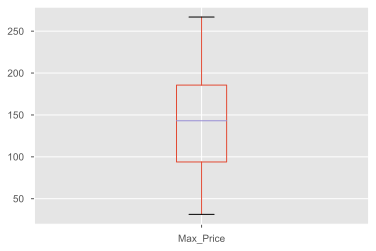

In [55]:
train_bundas.boxplot(column="Max_Price")  # Plot a single column

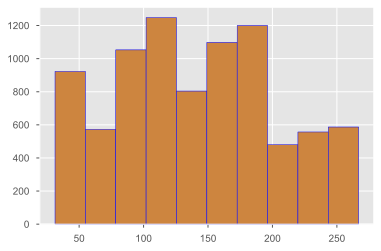

In [56]:
plt.hist(train_bundas['Max_Price'],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()

In [57]:
train_bundas["Max_Price"].mean()

140.9927819781768

In [58]:
train_bundas["Max_Price"].max()

266.8884

In [59]:
train_bundas["Max_Price"].min()

31.29

###### In this case the position of the median is closer to the upper quartile indication of skewness to the left, indicating that most of the items had a high maximum price. There are no outliers in this case.

## Visual Exploration Independent variables vs dependent variables

###### Having looked at each of the variables and their influence on the no of items sold we look at their influence on the sales amount.

### Weight and Item store Sales

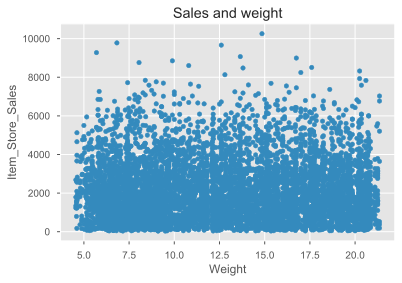

In [60]:

import matplotlib.pyplot as plot


# Load data into pandas DataFrame       
dataFrame = pd.DataFrame(data=train_bundas, columns=['Weight', 'Item_Store_Sales']);
# Draw a scatter plot
dataFrame.plot.scatter(x='Weight', y='Item_Store_Sales', title= "Sales and weight");

plot.show(block=True);

###### It can be observed that, at low weights there is both high and low sale amounts which is also the same in the case of the items with large weights. This and the combination of it having a uniform distribution for the number of items sold it can be concluded that weight has small to no influence on item store sales.

### visibility and item store sales

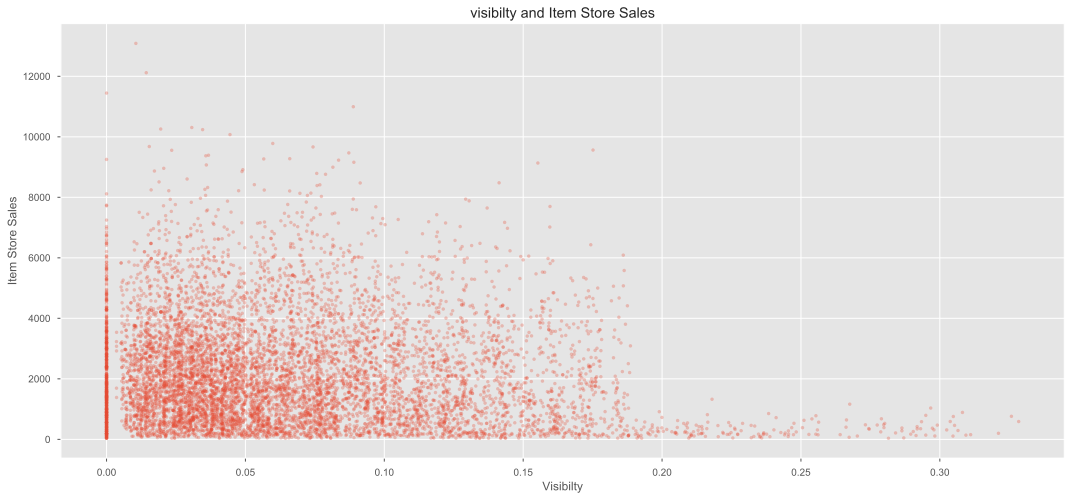

In [61]:
plt.figure(figsize=(18,8))
plt.xlabel("Visibilty")
plt.ylabel("Item Store Sales")
plt.title("visibilty and Item Store Sales")
plt.plot(train_bundas.Visibility, train_bundas["Item_Store_Sales"],'.', alpha = 0.3)

It can be observed that items with low visibility have the highest sales amounts. Essentially the more visible a product is the less the sales amount.     
As Visibily increases the sales decrease. It can be observed that items with low visibility have the highest sales amounts. Essentially the more visible a product is the less the sales amount. 

###### most of sales has been obtained from products whose visibility is less than 0.20

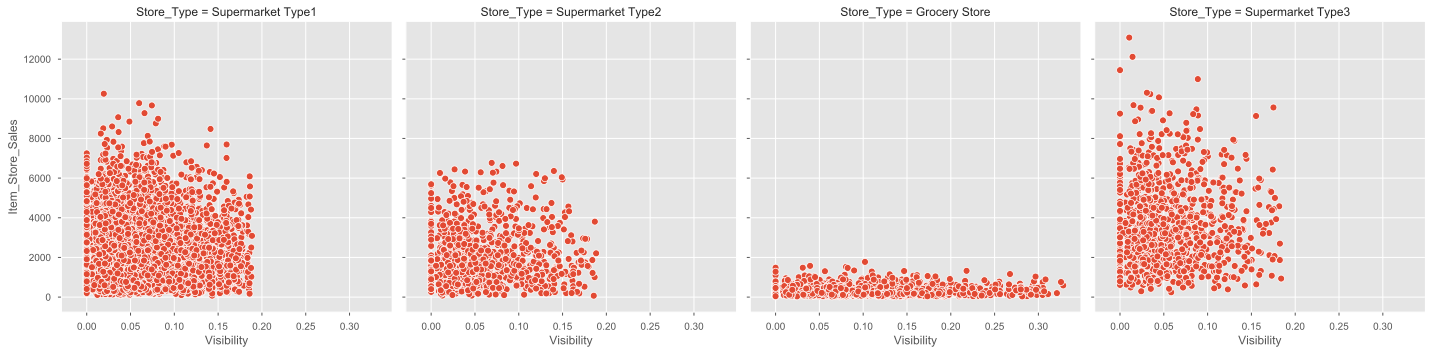

In [62]:
sns.relplot(x='Visibility',y='Item_Store_Sales',col='Store_Type',data=train_bundas)

###### It can be observed that when you combine with store type visibility is seen to have less influence on the sales amount.  


### Category and item store sales

###### Fruits and Vegetables, stanchy food, seafood contribute to the highest amount item store sales.


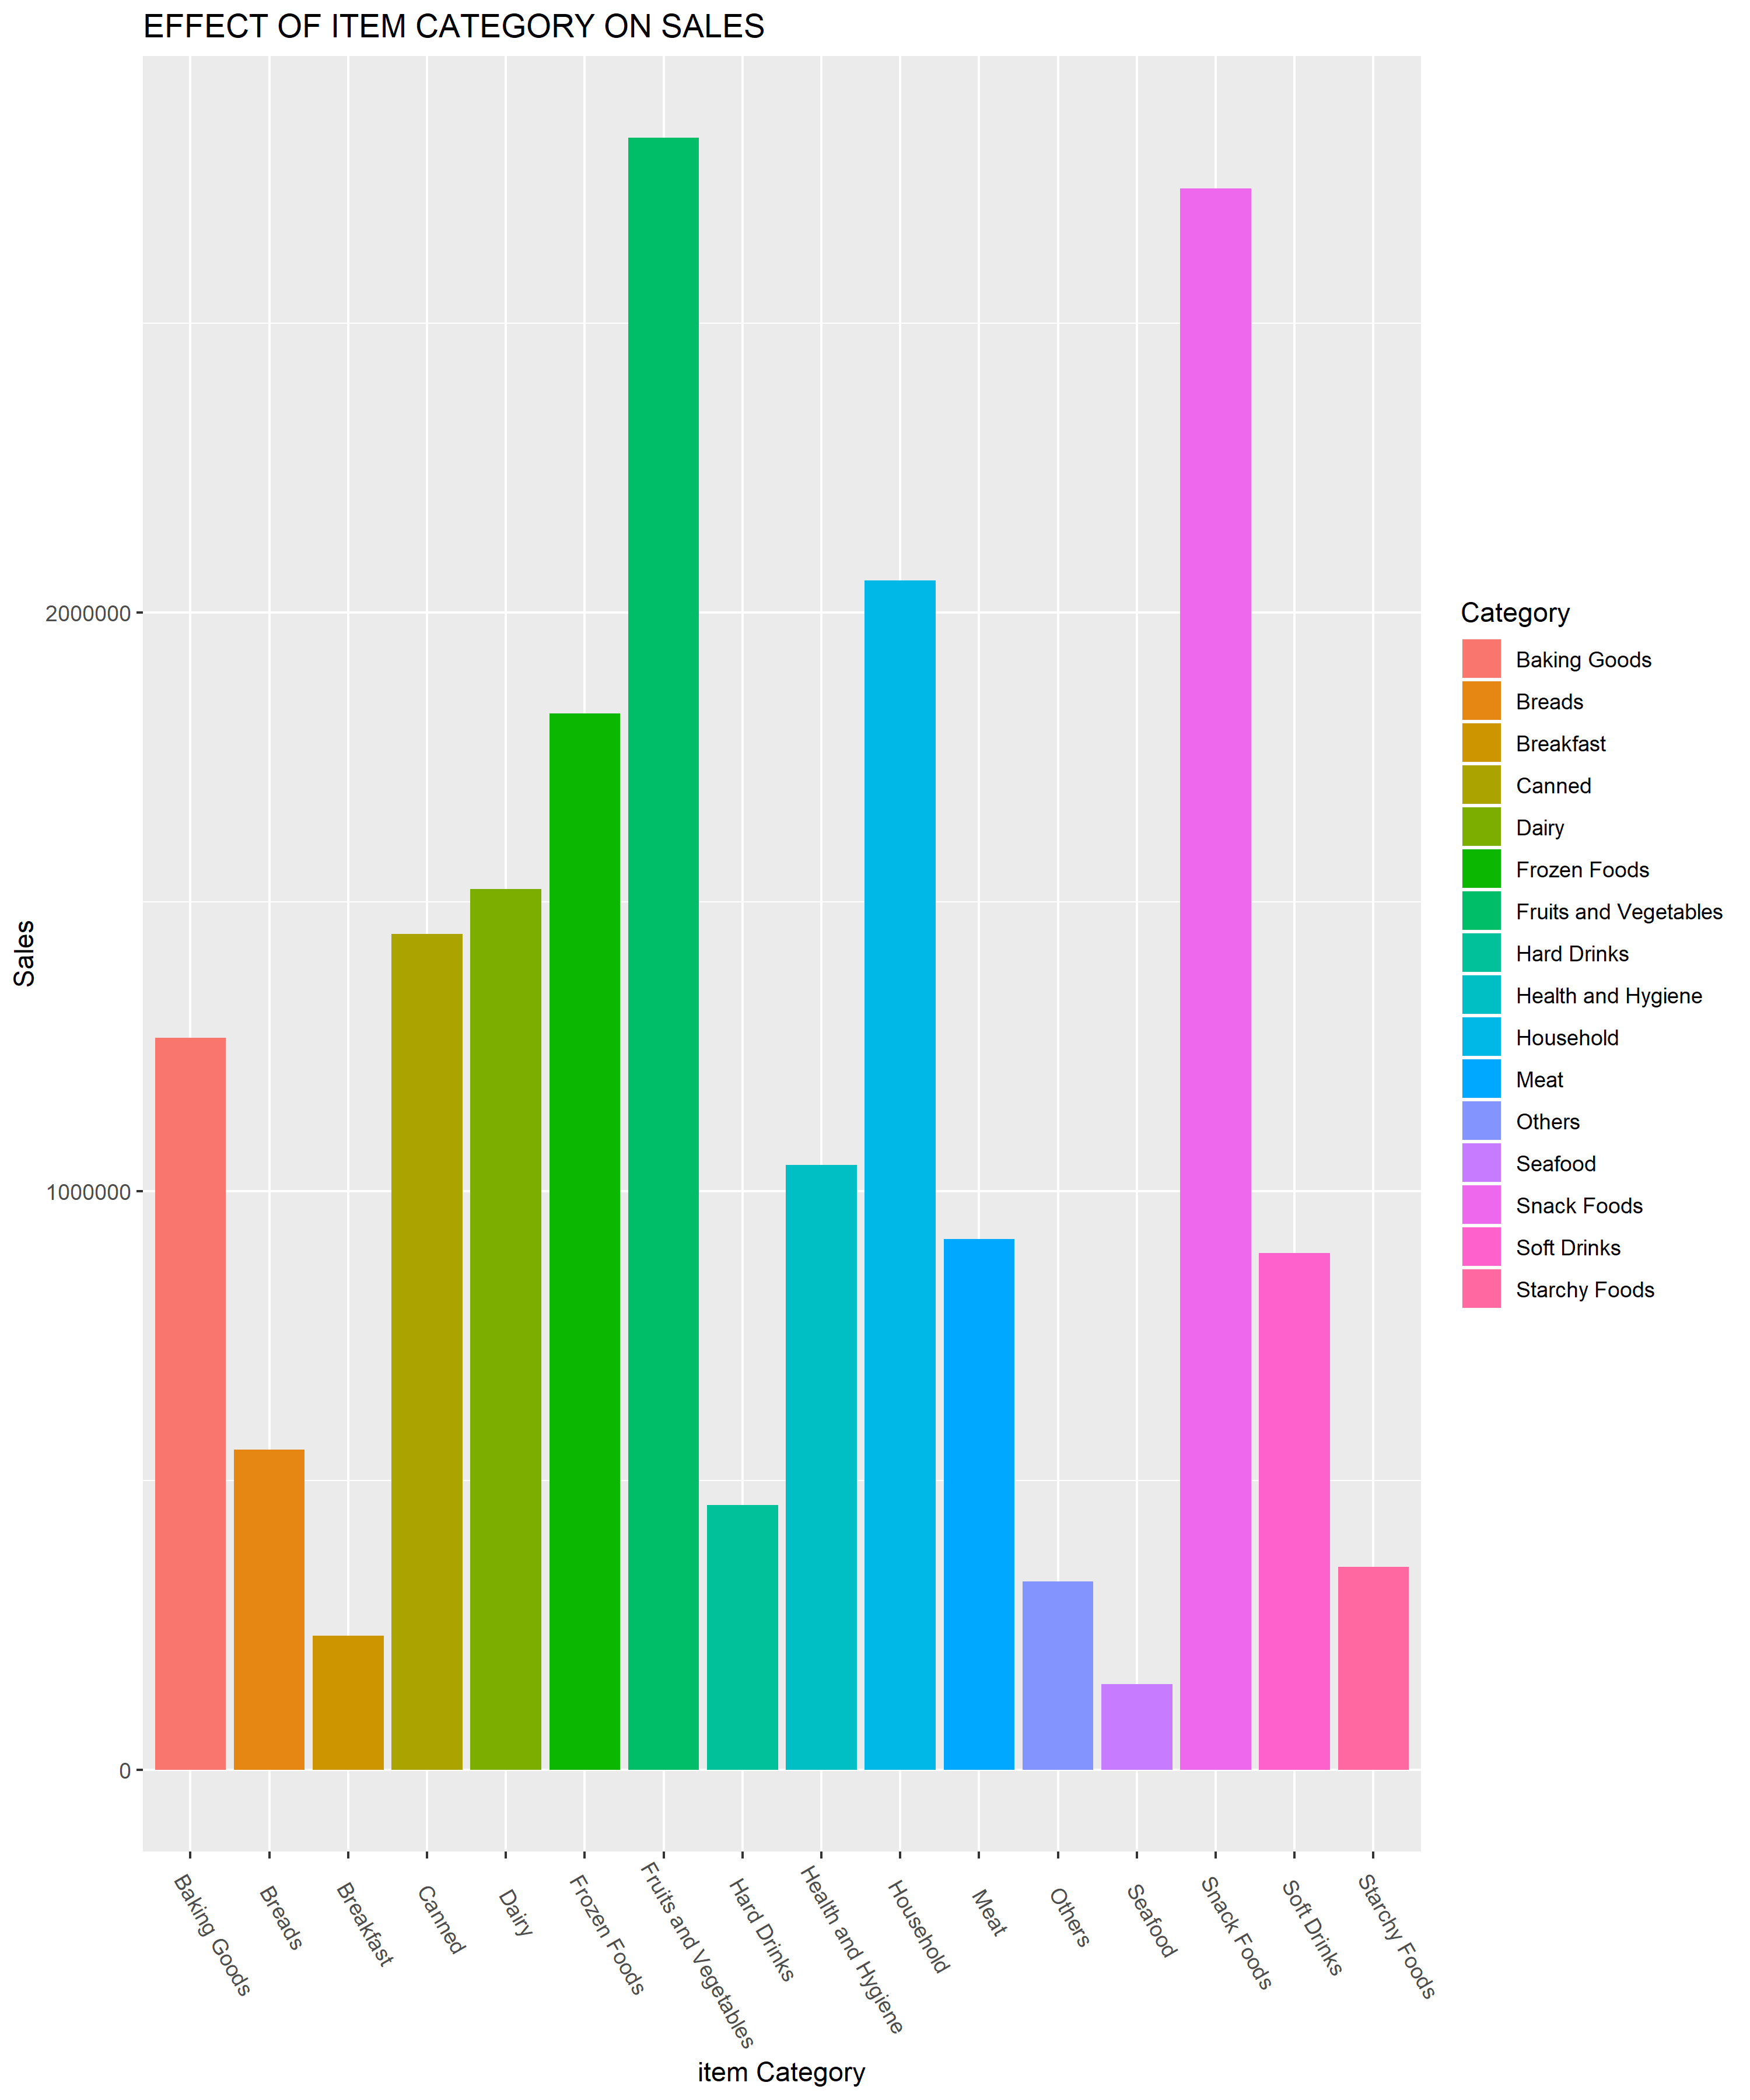

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

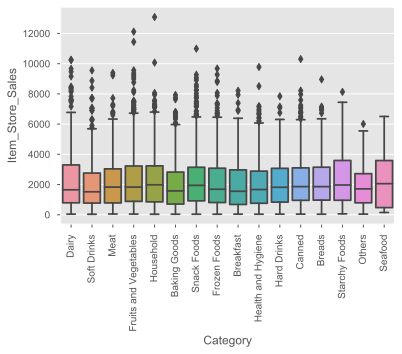

In [64]:
sns.boxplot(x='Category', y='Item_Store_Sales', data=train_bundas)
plt.xticks(rotation=90)

######  It can be observed that fruits and vegetables, snack foods and household items had the highest sales this may be due to value of the items or the frequency of purchase.  It can also be observed that sea food and breakfast items had very low total sales.
###### It can also be observed that dairy, fruits and vegetables and household items have high and concentrated outliers indicating possibility of making higher sales.
###### The dairy, starchy foods and seafood have wider boxes indicating that the sales values are highly volatile hence the possibility of making huge and small sales.
###### It can be concluded that the category of the item has an influence on sales.


### Fat content and Item Store Sales

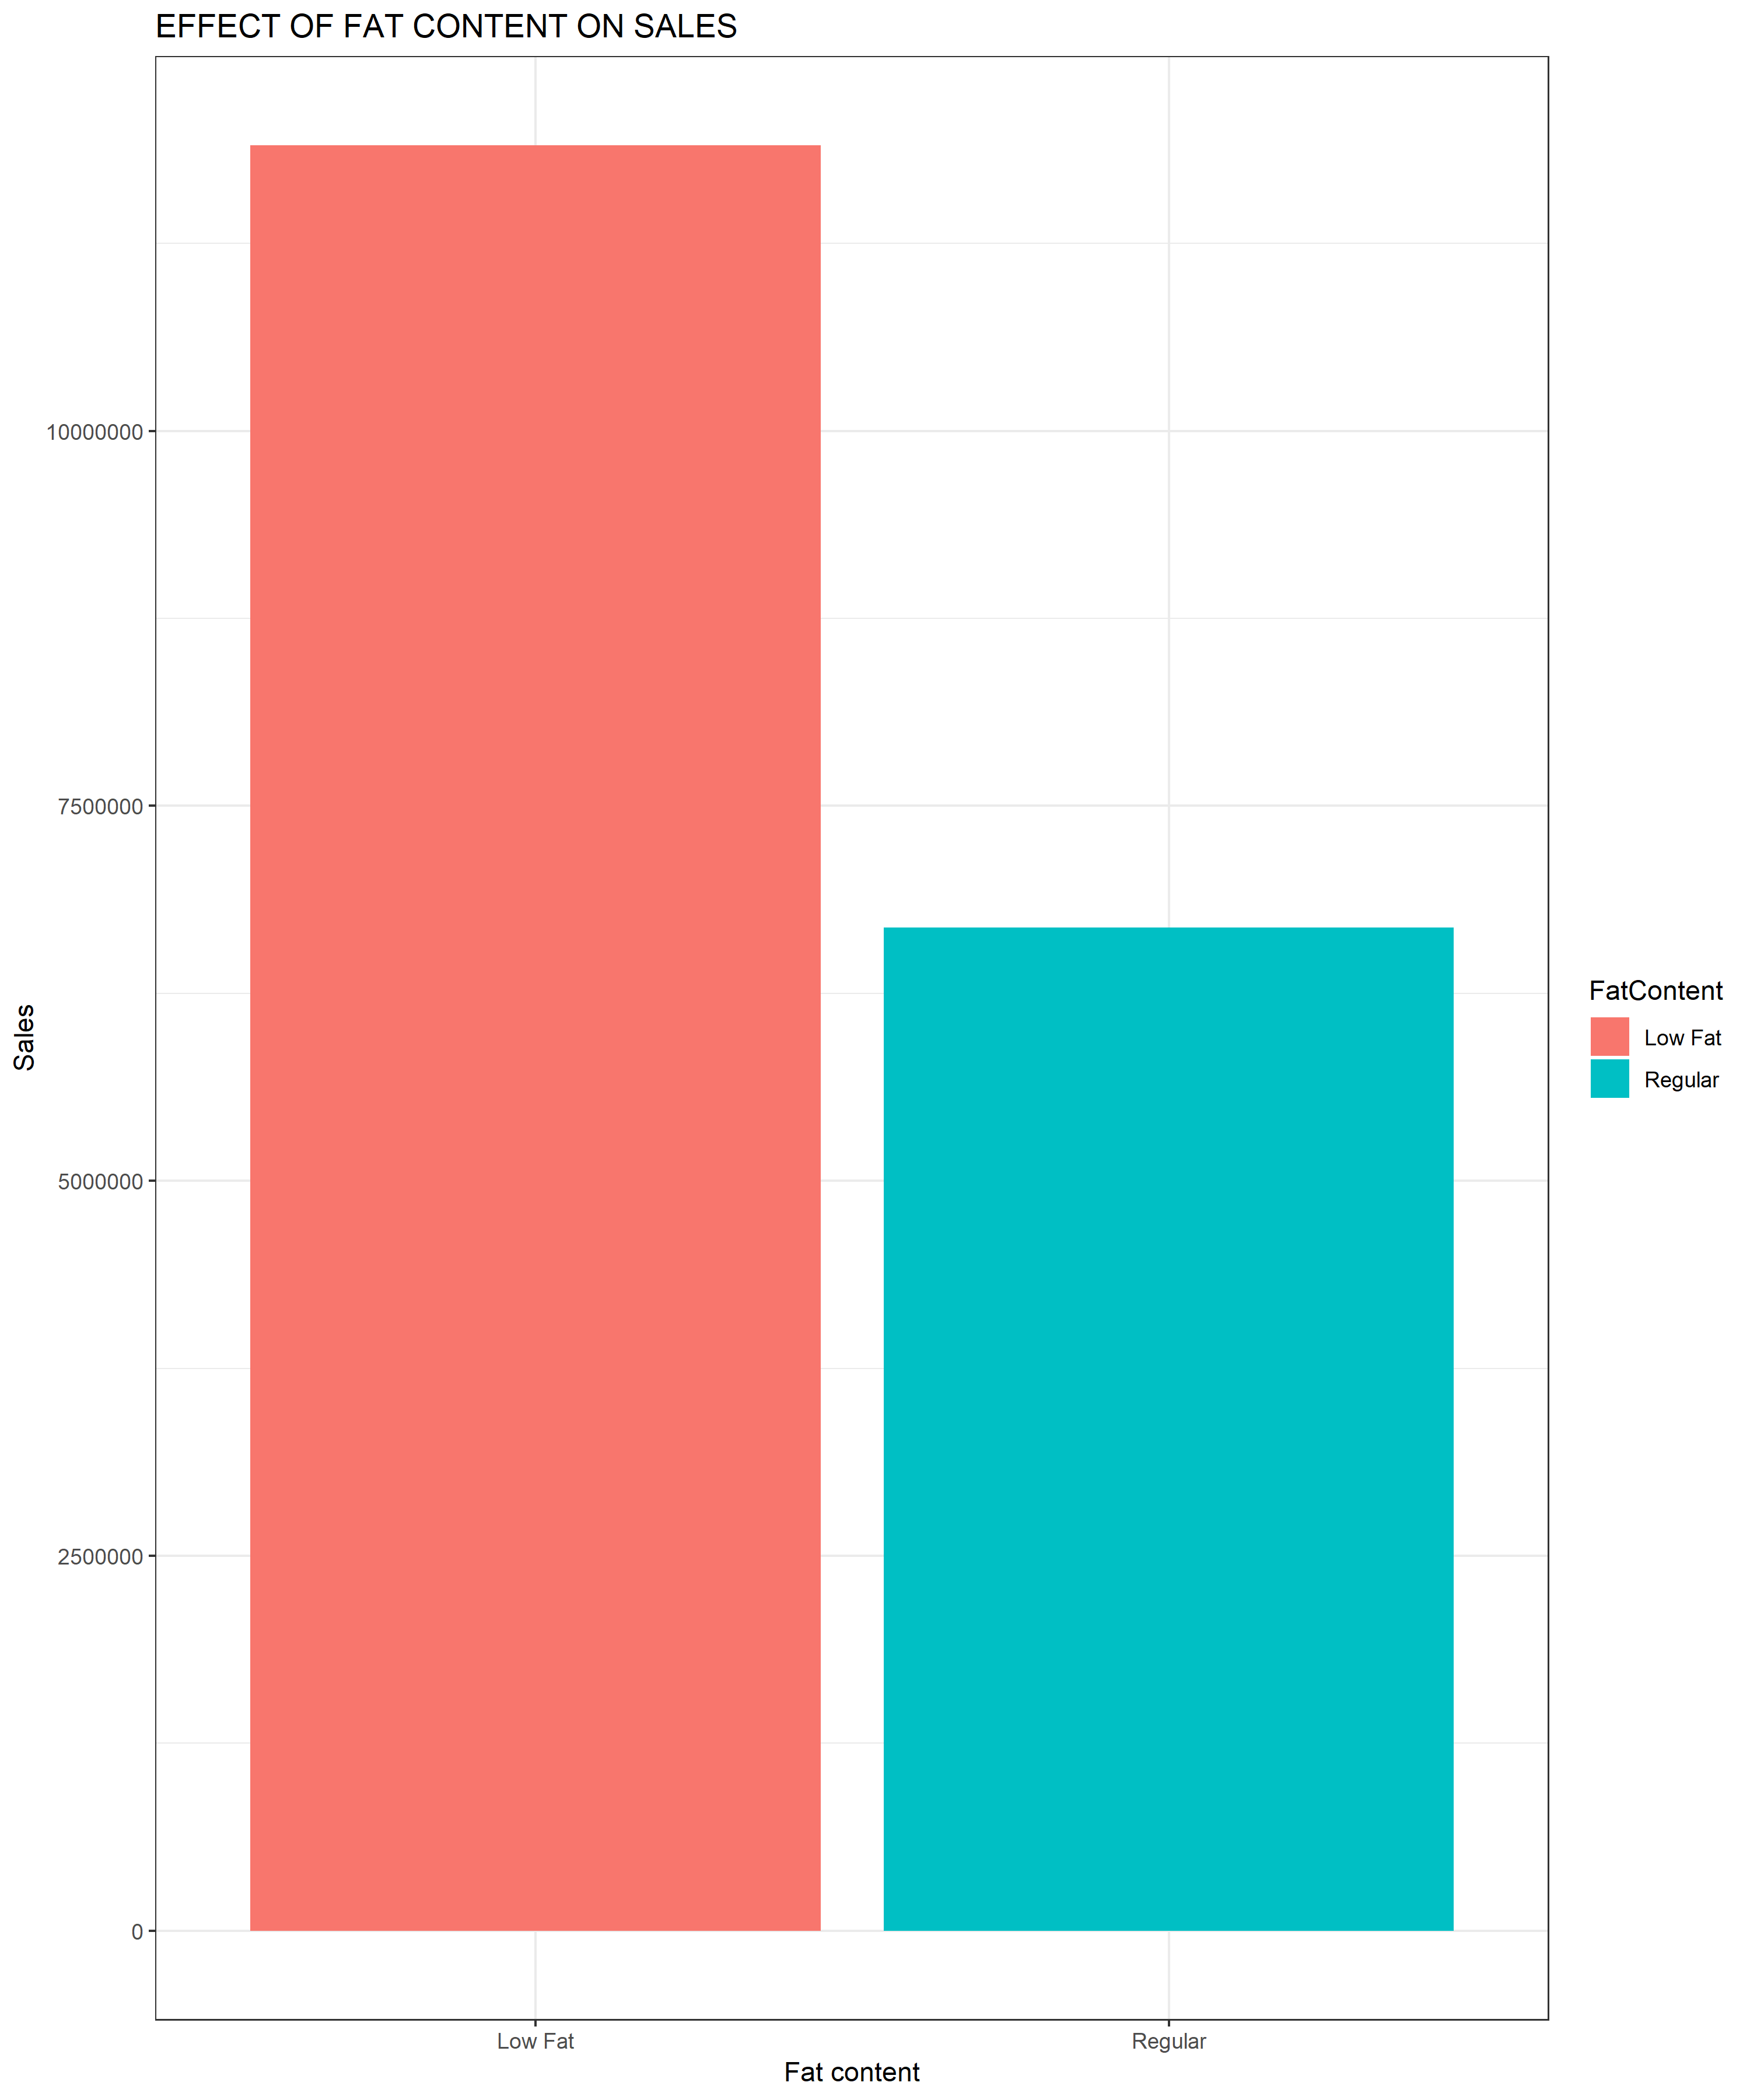

(array([0, 1]), <a list of 2 Text xticklabel objects>)

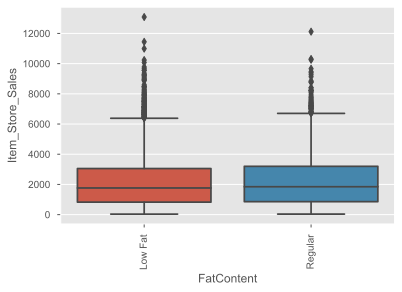

In [66]:
sns.boxplot(x='FatContent', y='Item_Store_Sales', data=train_bundas)
plt.xticks(rotation=90)

###### Products with a regular fat content have a slightly higher sales as compared to low fat products.
###### The product sales are seen to vary the same as the two categories have almost equal box sizes, but the regular fat content category has slighlty higher values for the outliers which maybe the cause of it having slightly higher sales.  
###### It can be said that the fat content has little influence on the sales value.


### Store and Item store sales

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

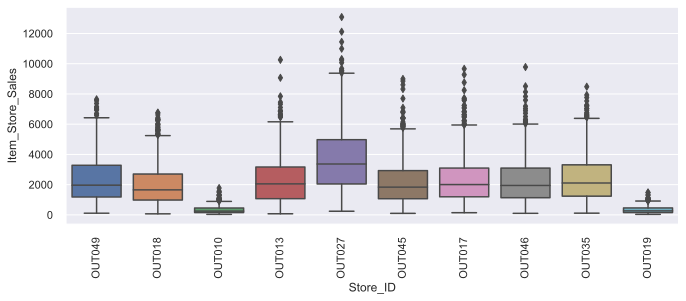

In [138]:
sns.boxplot(x='Store_ID', y='Item_Store_Sales', data=train_bundas)
plt.xticks(rotation=90)

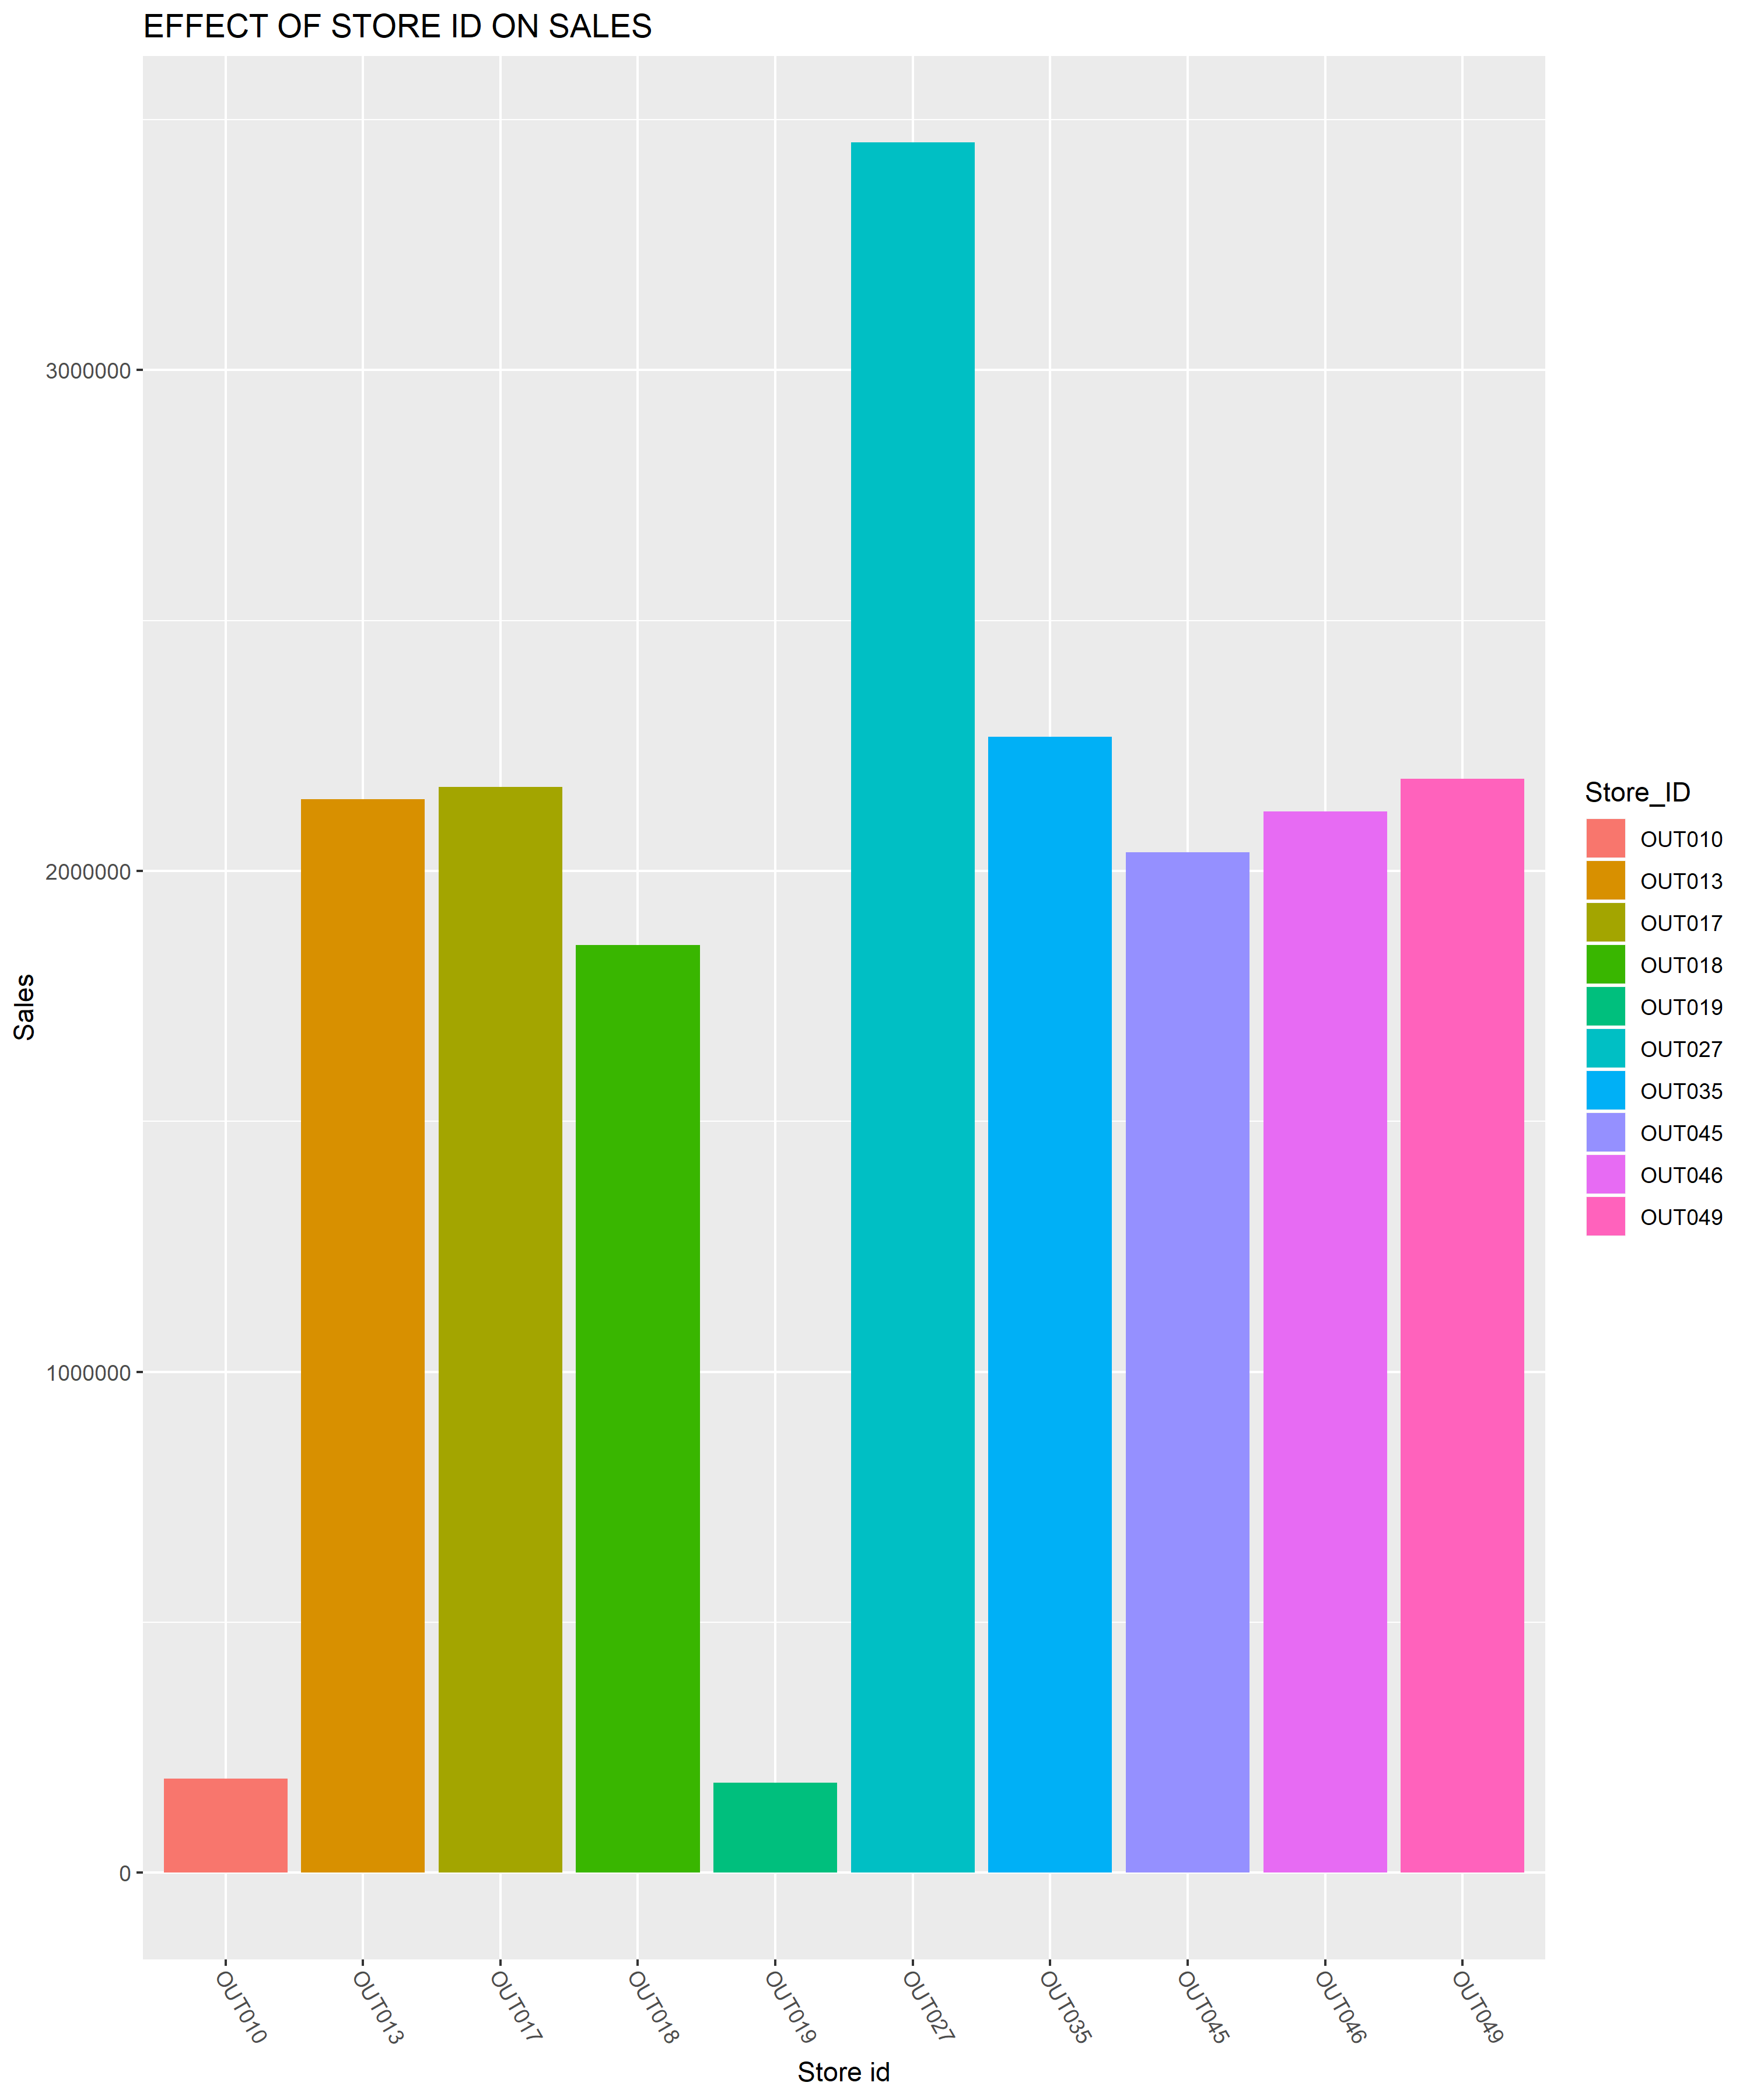

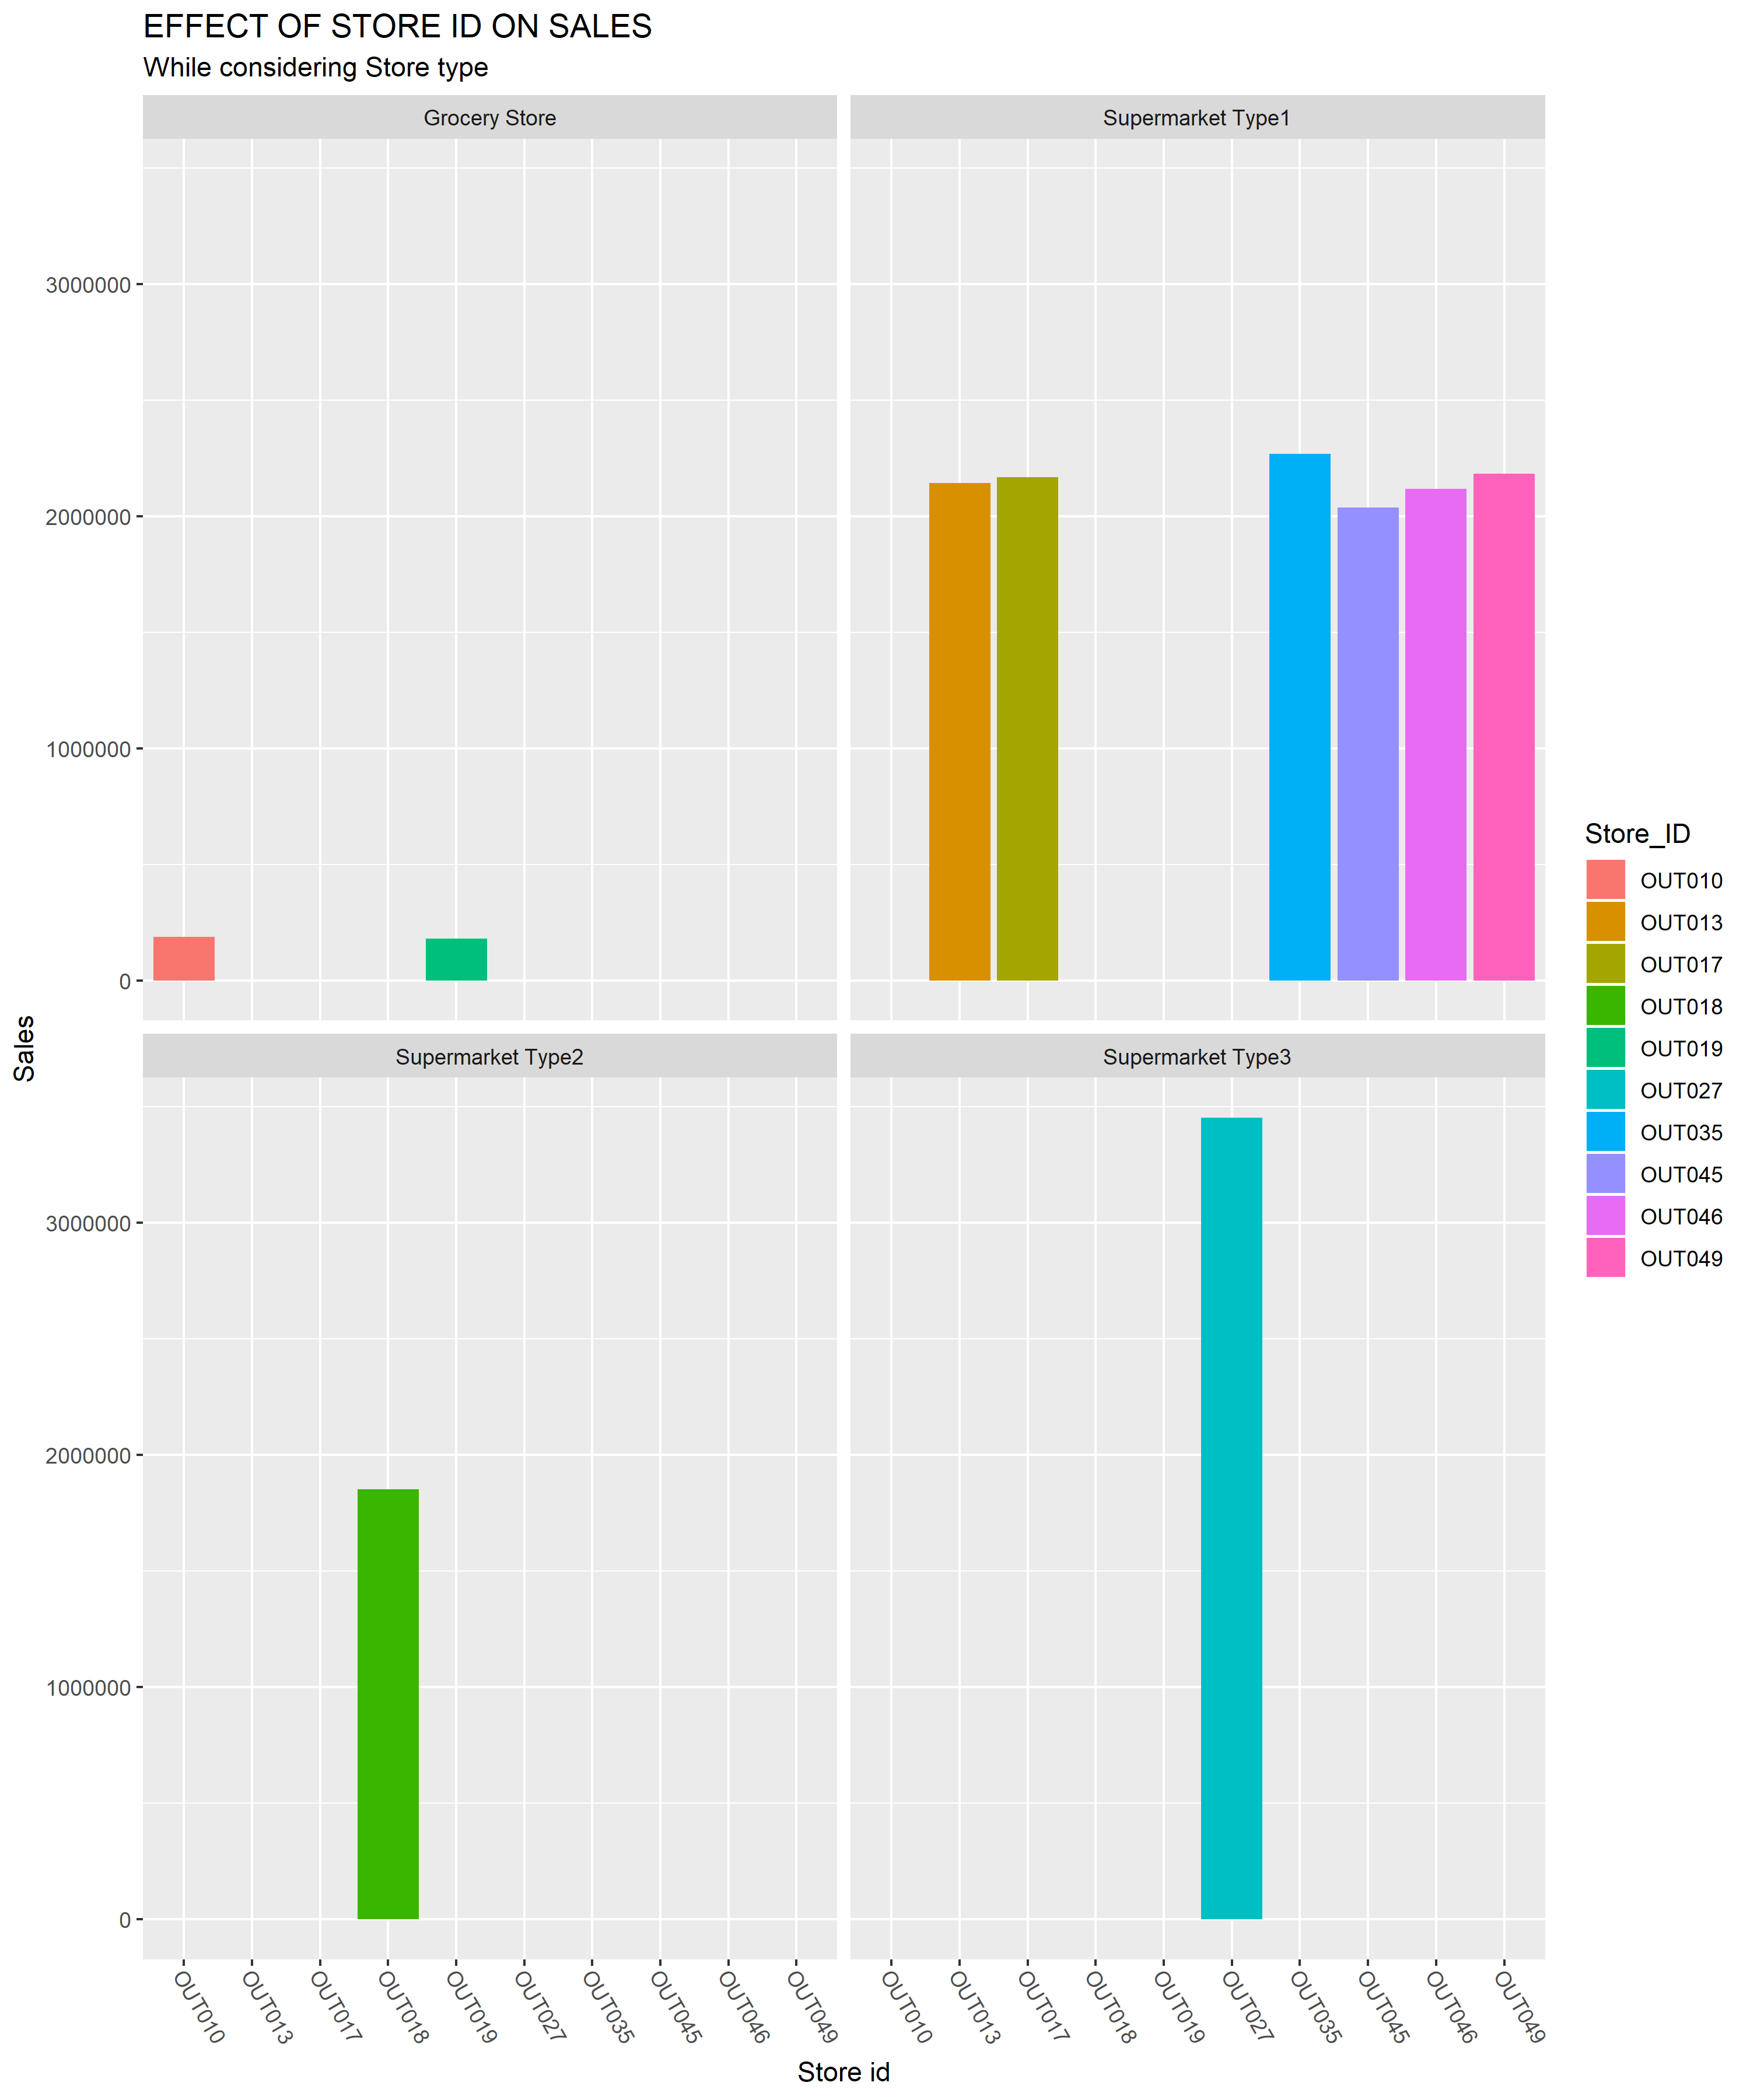

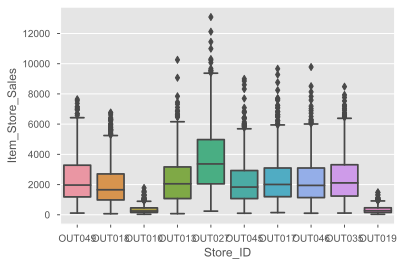

In [69]:
#train_bundas.boxplot(column="Item_Store_Sales")  # Plot a single column
sns.boxplot(x='Store_ID', y='Item_Store_Sales', data=train_bundas)


###### From the plots it can be seen almost all the stores have the same sales apart from OUT027 which has high sales while OUT010 and OUT019 have very small sales.
###### The size of the boxplots are almost similar indicating that the stores sales almost vary in the same magnitude. The OUT027 store has a wider box indicating that the sales greatly vary while in OUT010 and OUTO19 stores have the most narrow boxes indicating that the sales in this category least volatile 

###### The size of the boxplots are almost similar indicating that the stores sales almost vary in the same magnitude. The OUT027 store has a wider box indicating that the sales greatly vary while in OUT010 and OUTO19 stores have the most narrow boxes indicating that the sales in this category least volatile . It can be said that the store id is important in determining the sales amount.

### Store size and item store sale

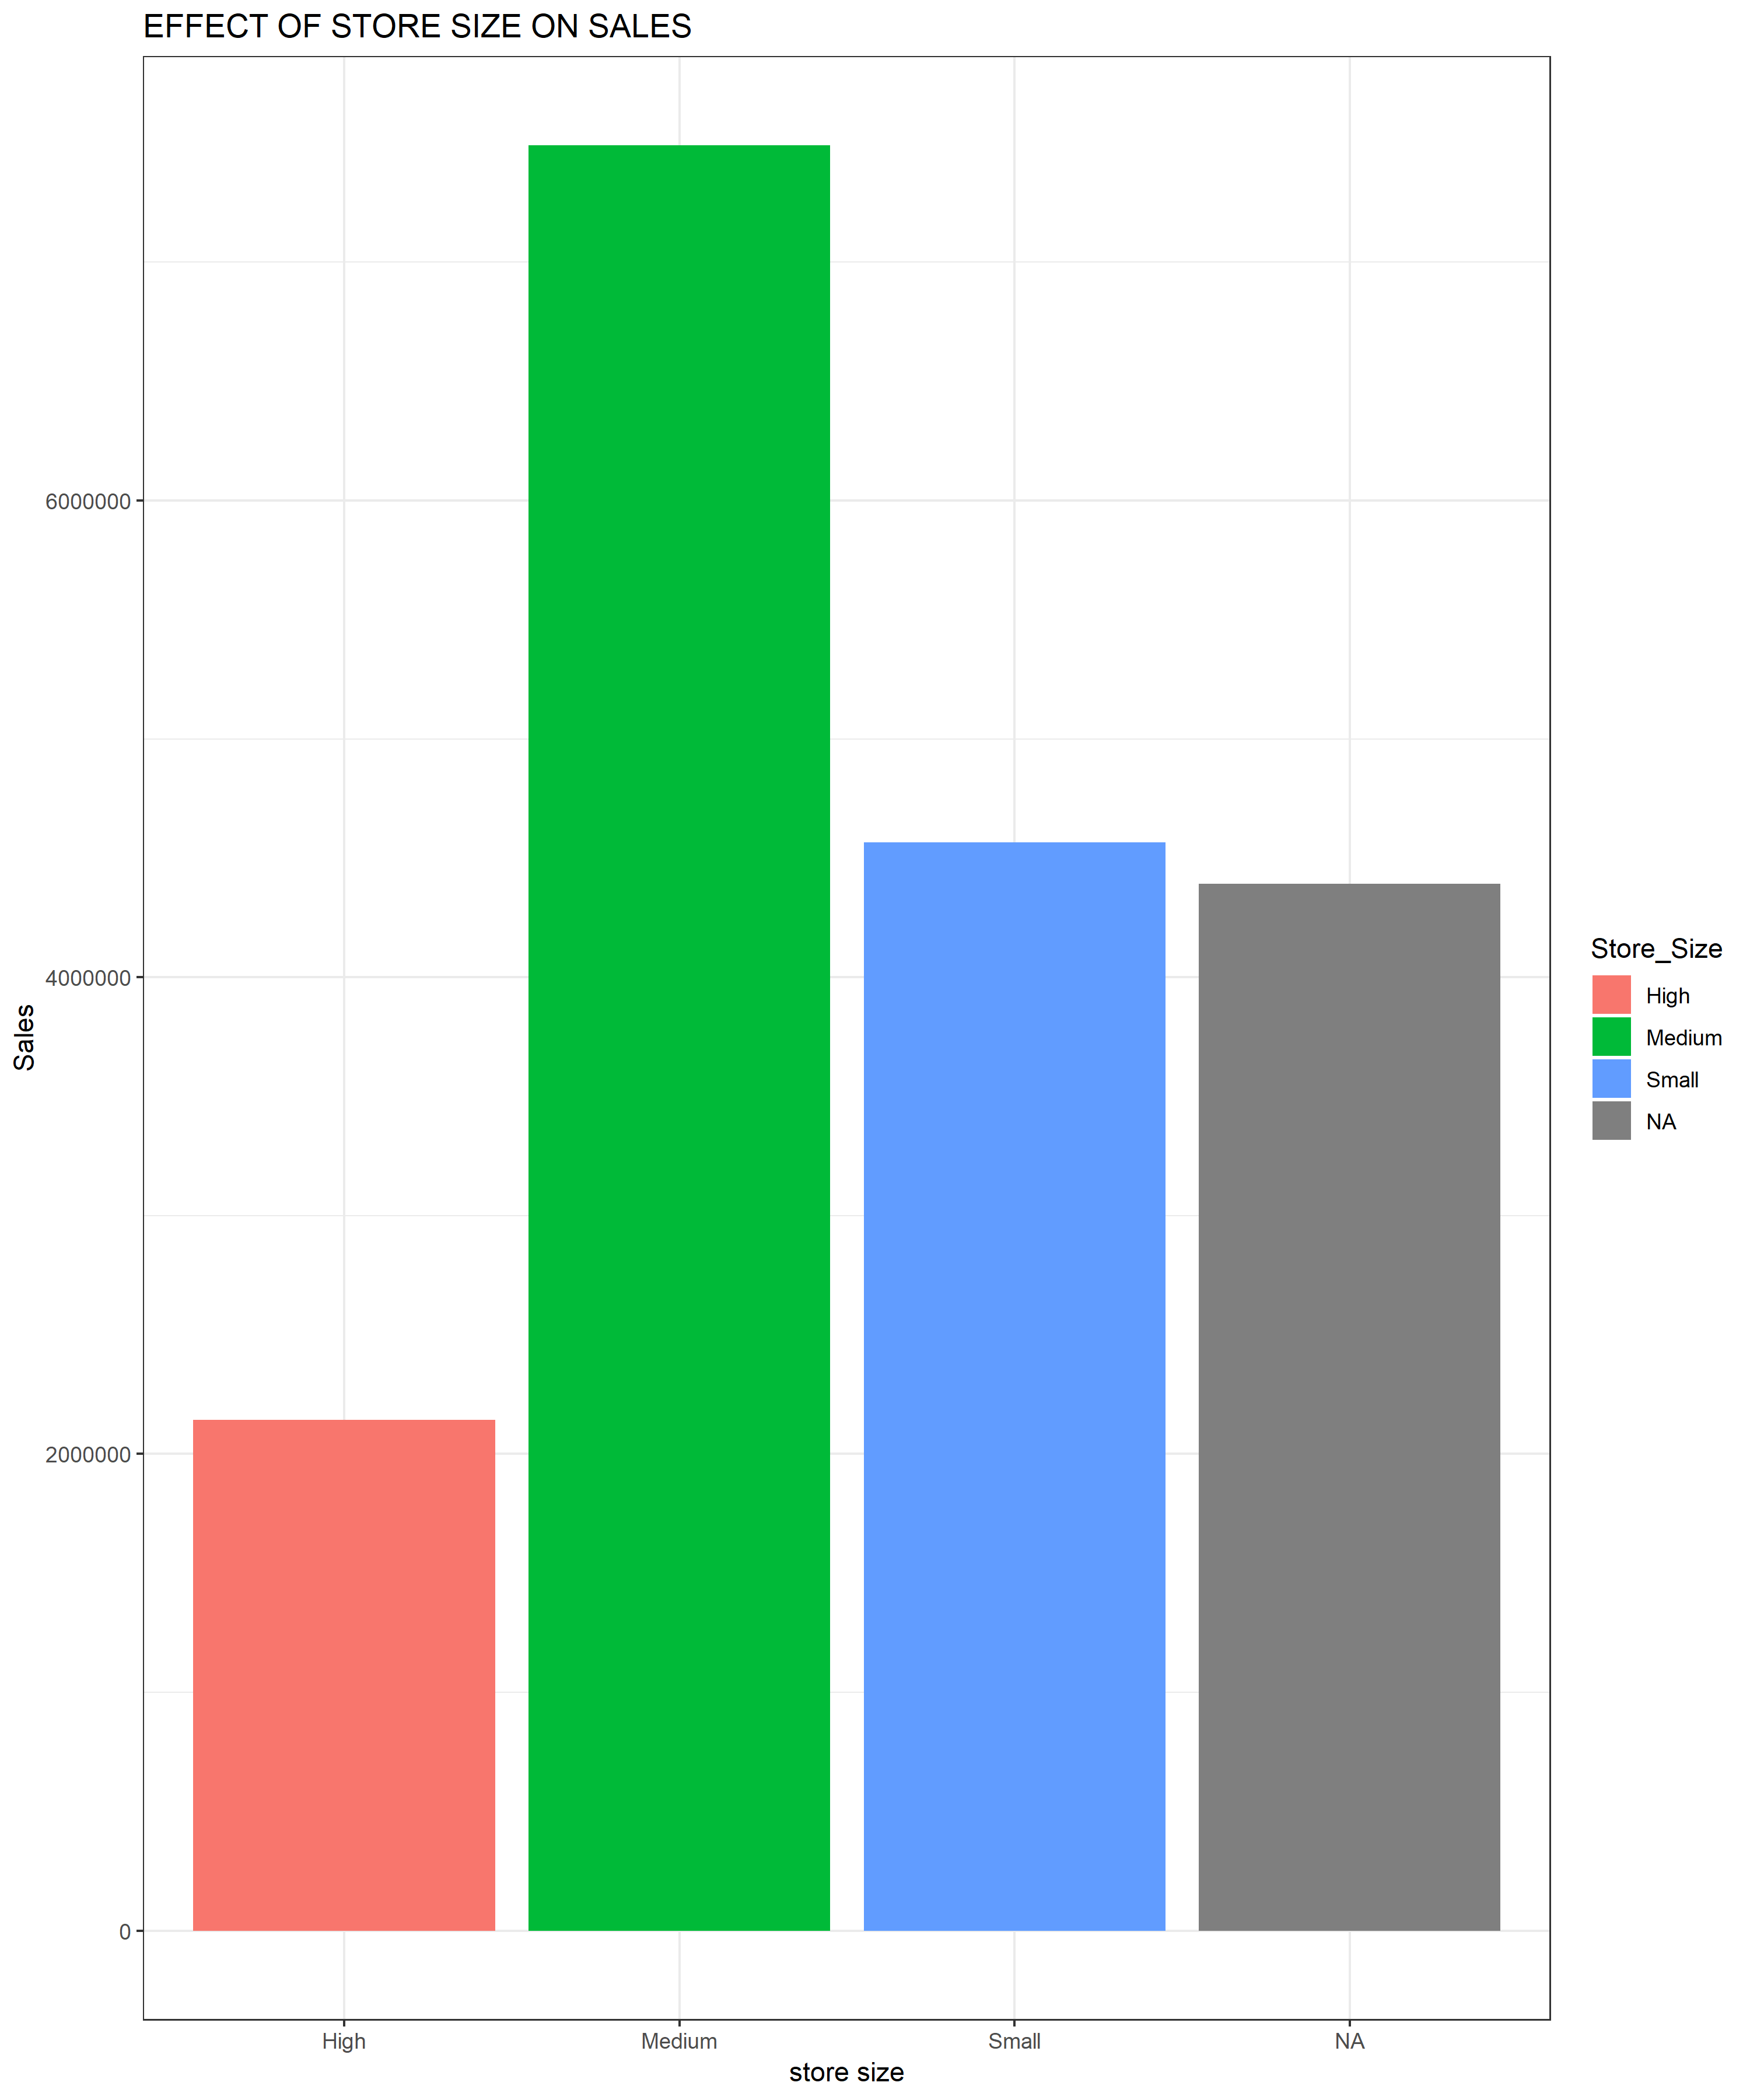

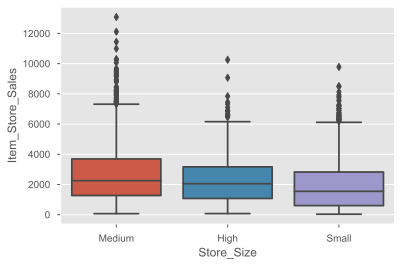

In [87]:

#train_bundas.boxplot(column="size")  # Plot a single column
sns.boxplot(x='Store_Size', y='Item_Store_Sales', data=train_bundas)

It can be observed that the medium sized stores have the highest sales followed by the small stores, we further analyzed this and discovered that this could be because the medium size is spread out across all the store types.   
      
From the boxplot it can be seen that the sales volatility is the same across the three store sizes as the sizes of the boxes are almost equal. It is important to note that in the case of the medium store size the median line is closer to the lower quartile an indication that most of the sales in this size category are low. Given the variation of the sales amount across the three store sizes it can be said that this is an important parameter when looking at the sales amount.     


### Store Location Type and Item Store Sales

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

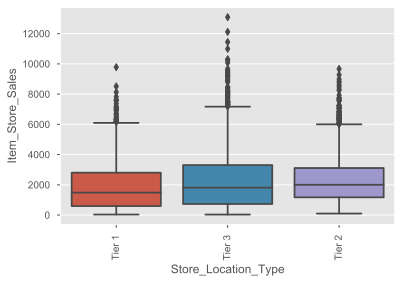

In [74]:
sns.boxplot(x='Store_Location_Type', y='Item_Store_Sales', data=train_bundas)
plt.xticks(rotation=90)

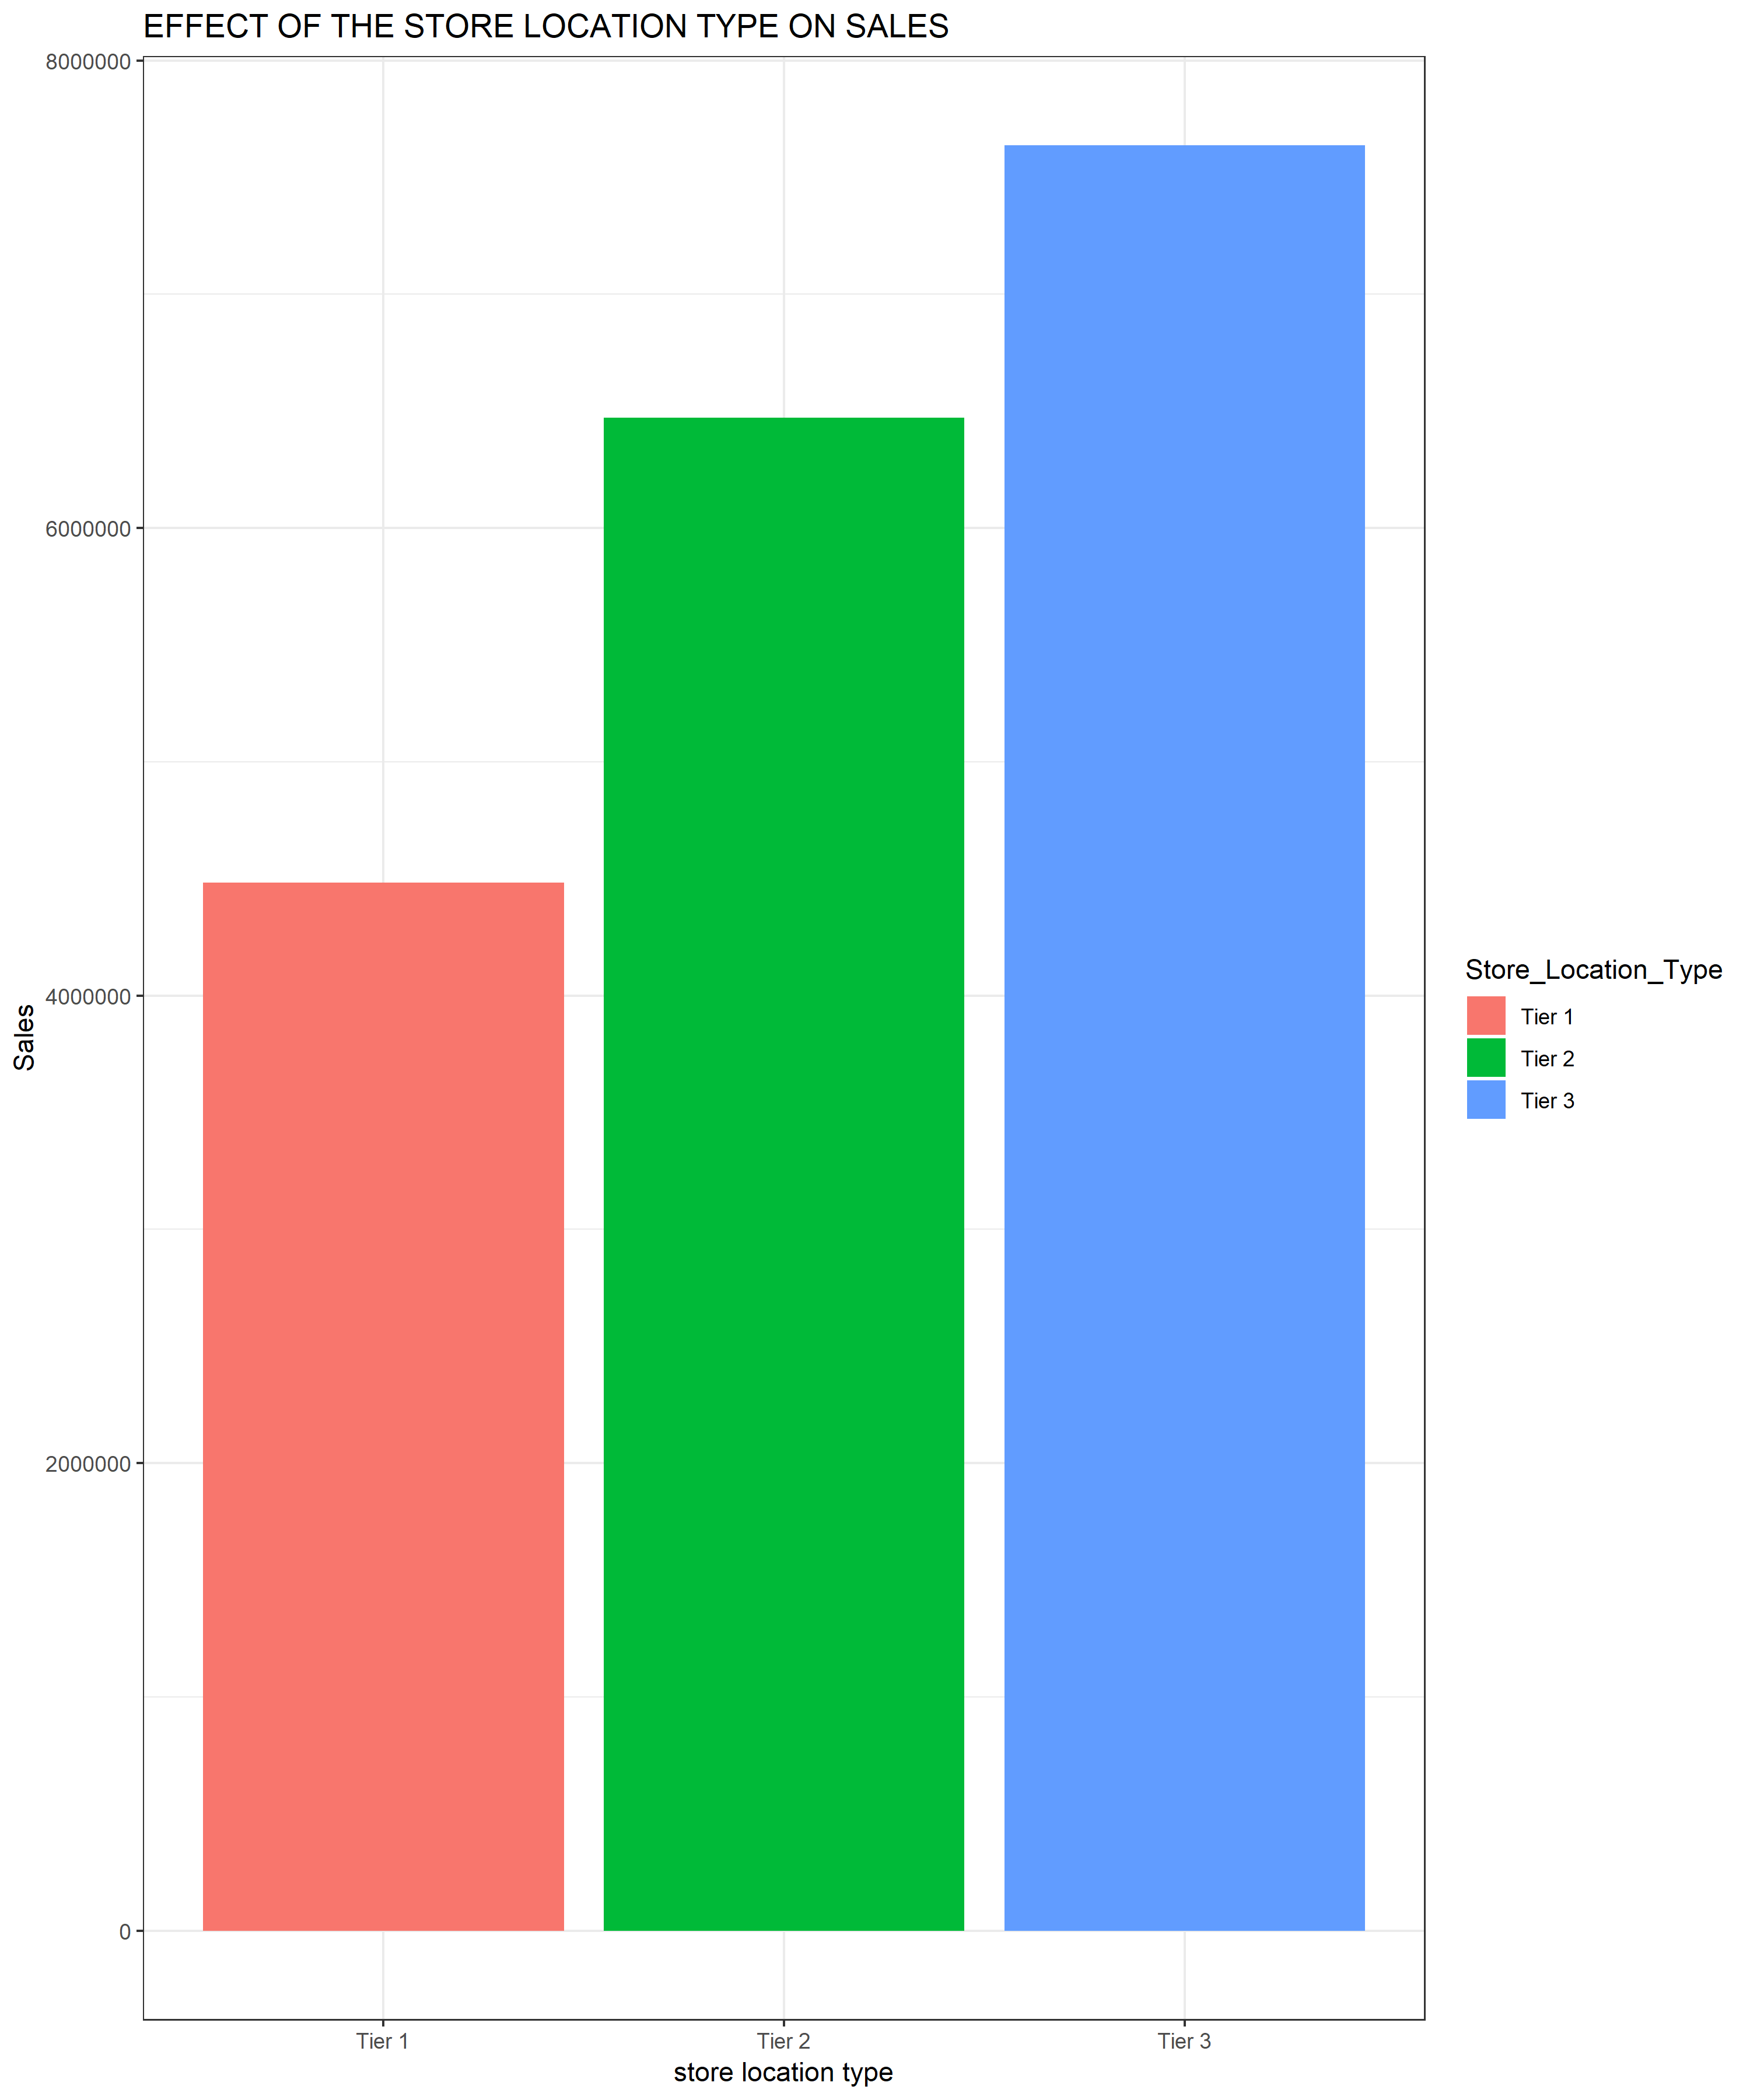

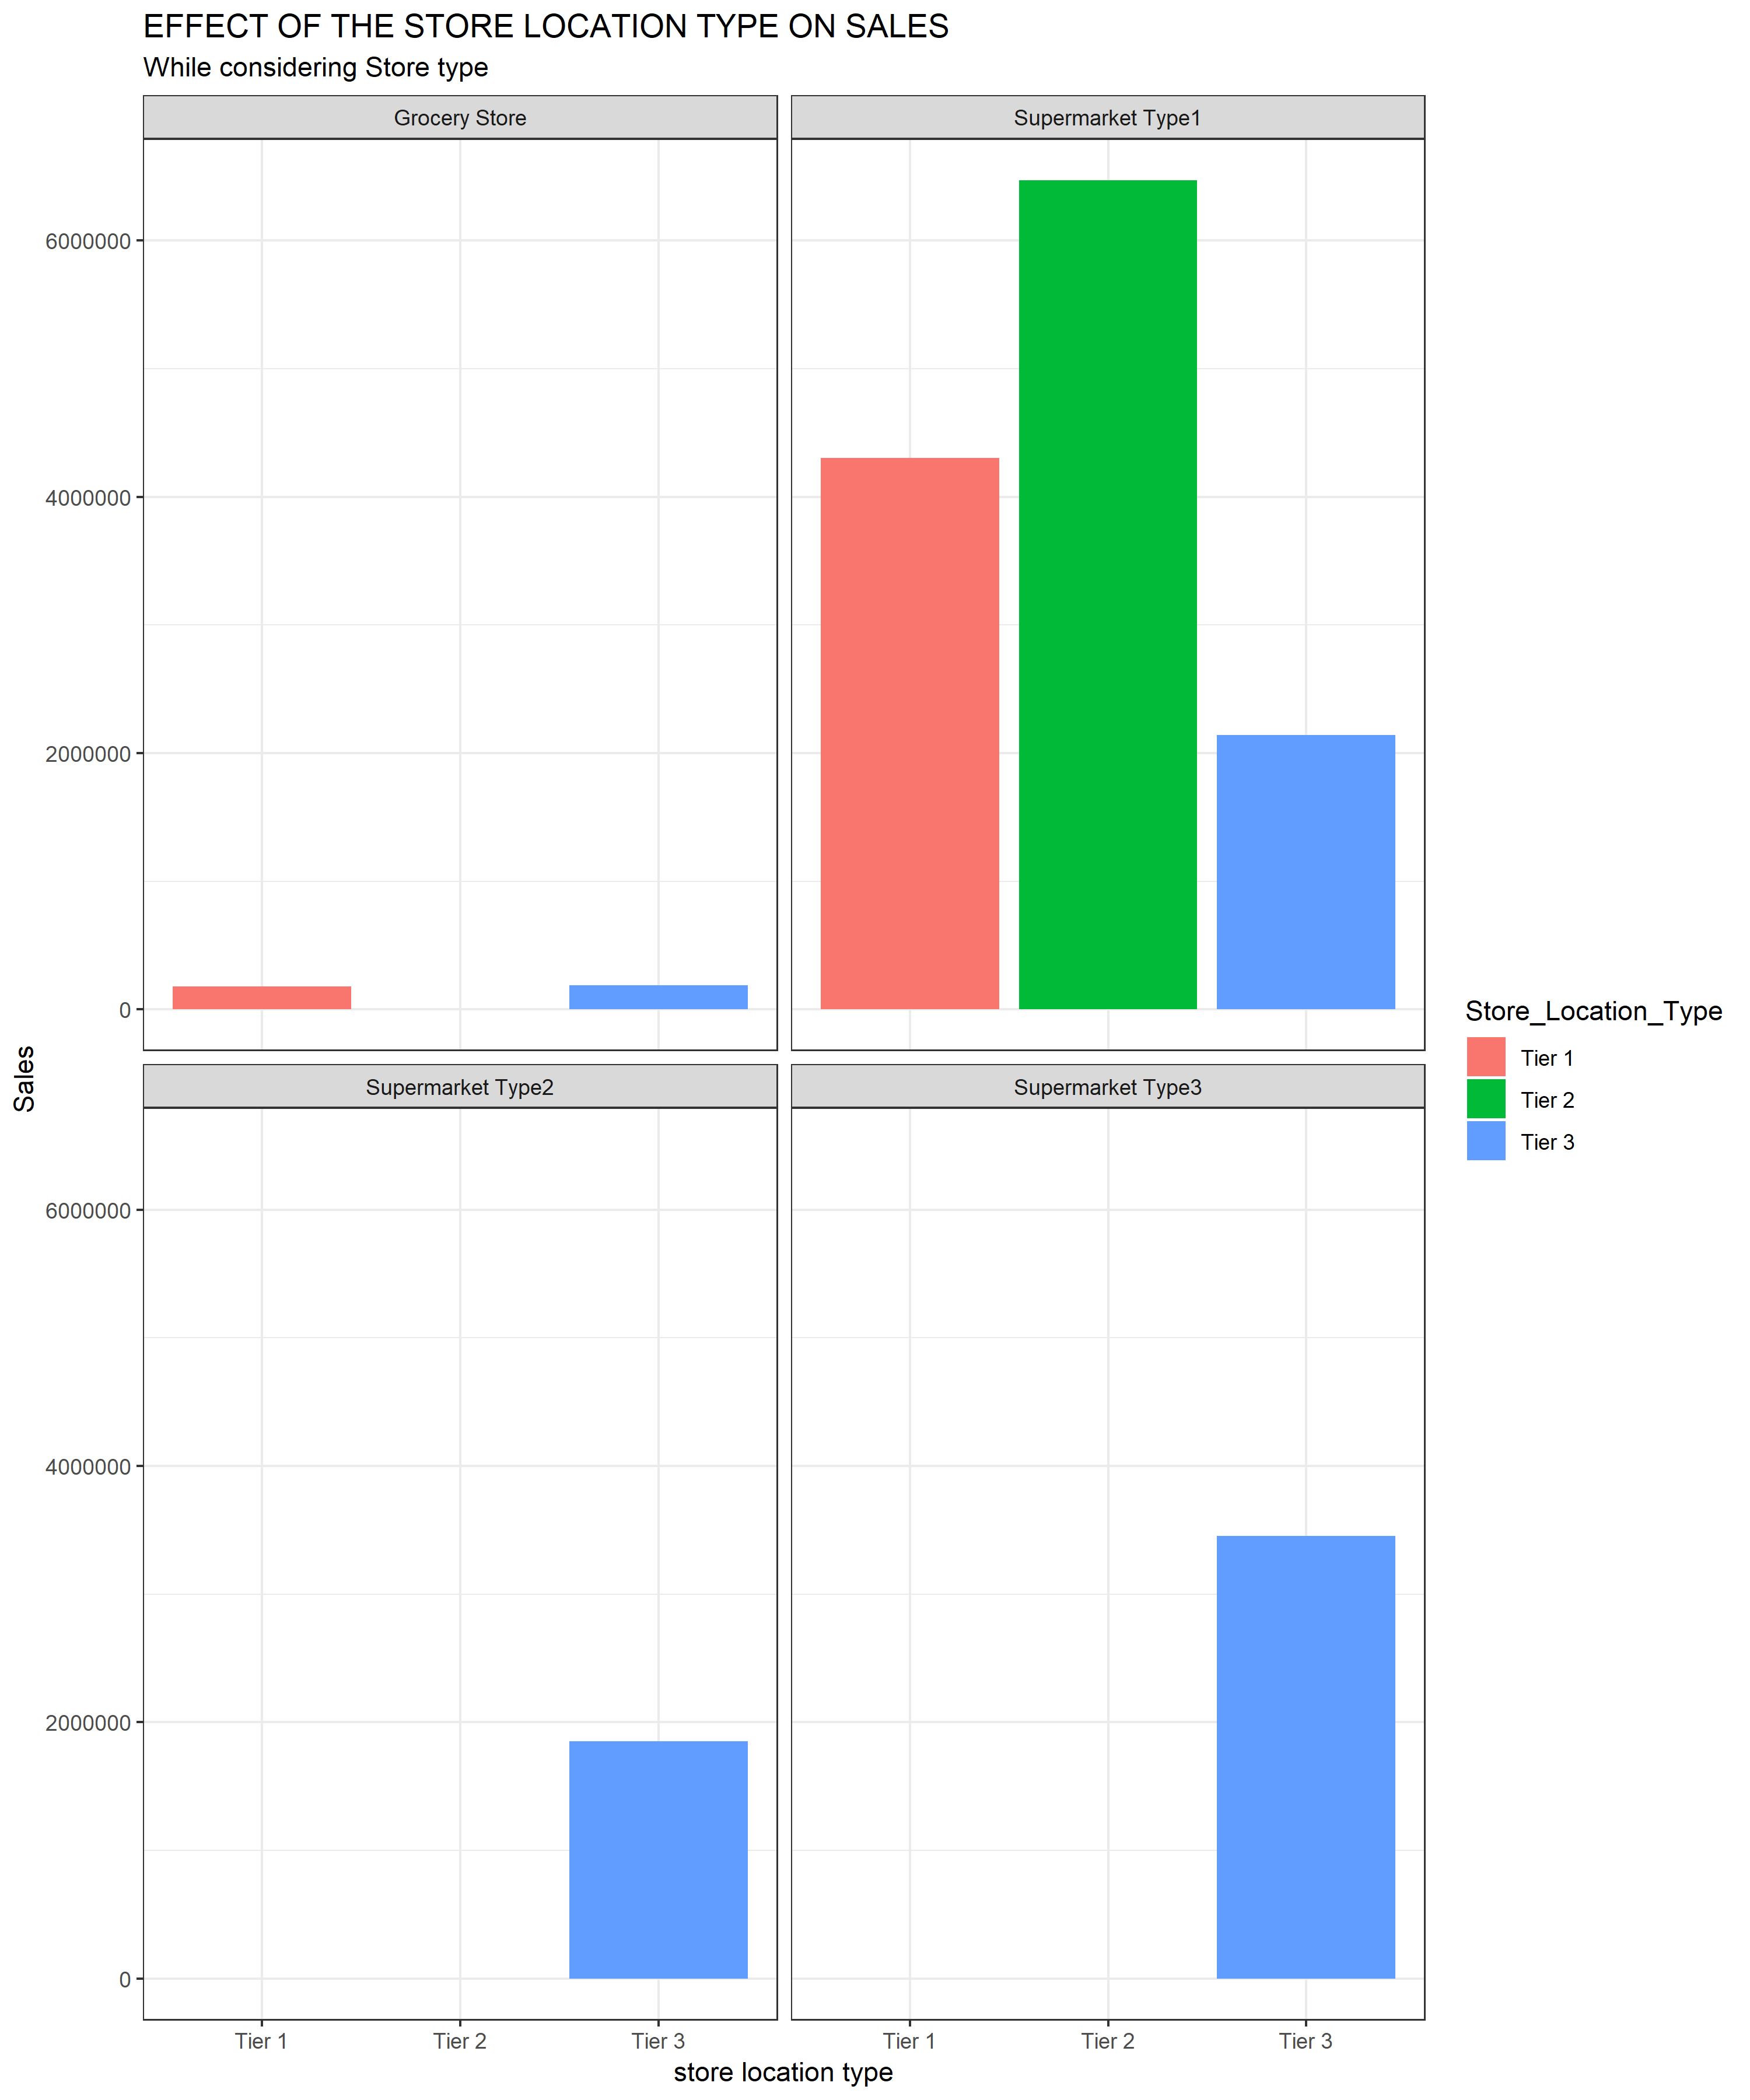

It can be observed that tier 3 stores have the highest sales this can be due to the fact that they are distributed across all the four store types. They also have the widest boxes indicating that the sales in this location type are greatly varying.

### Store Type and item Store Sales

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

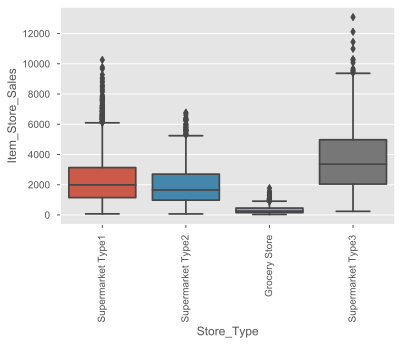

In [77]:
sns.boxplot(x='Store_Type', y='Item_Store_Sales', data=train_bundas)
plt.xticks(rotation=90)

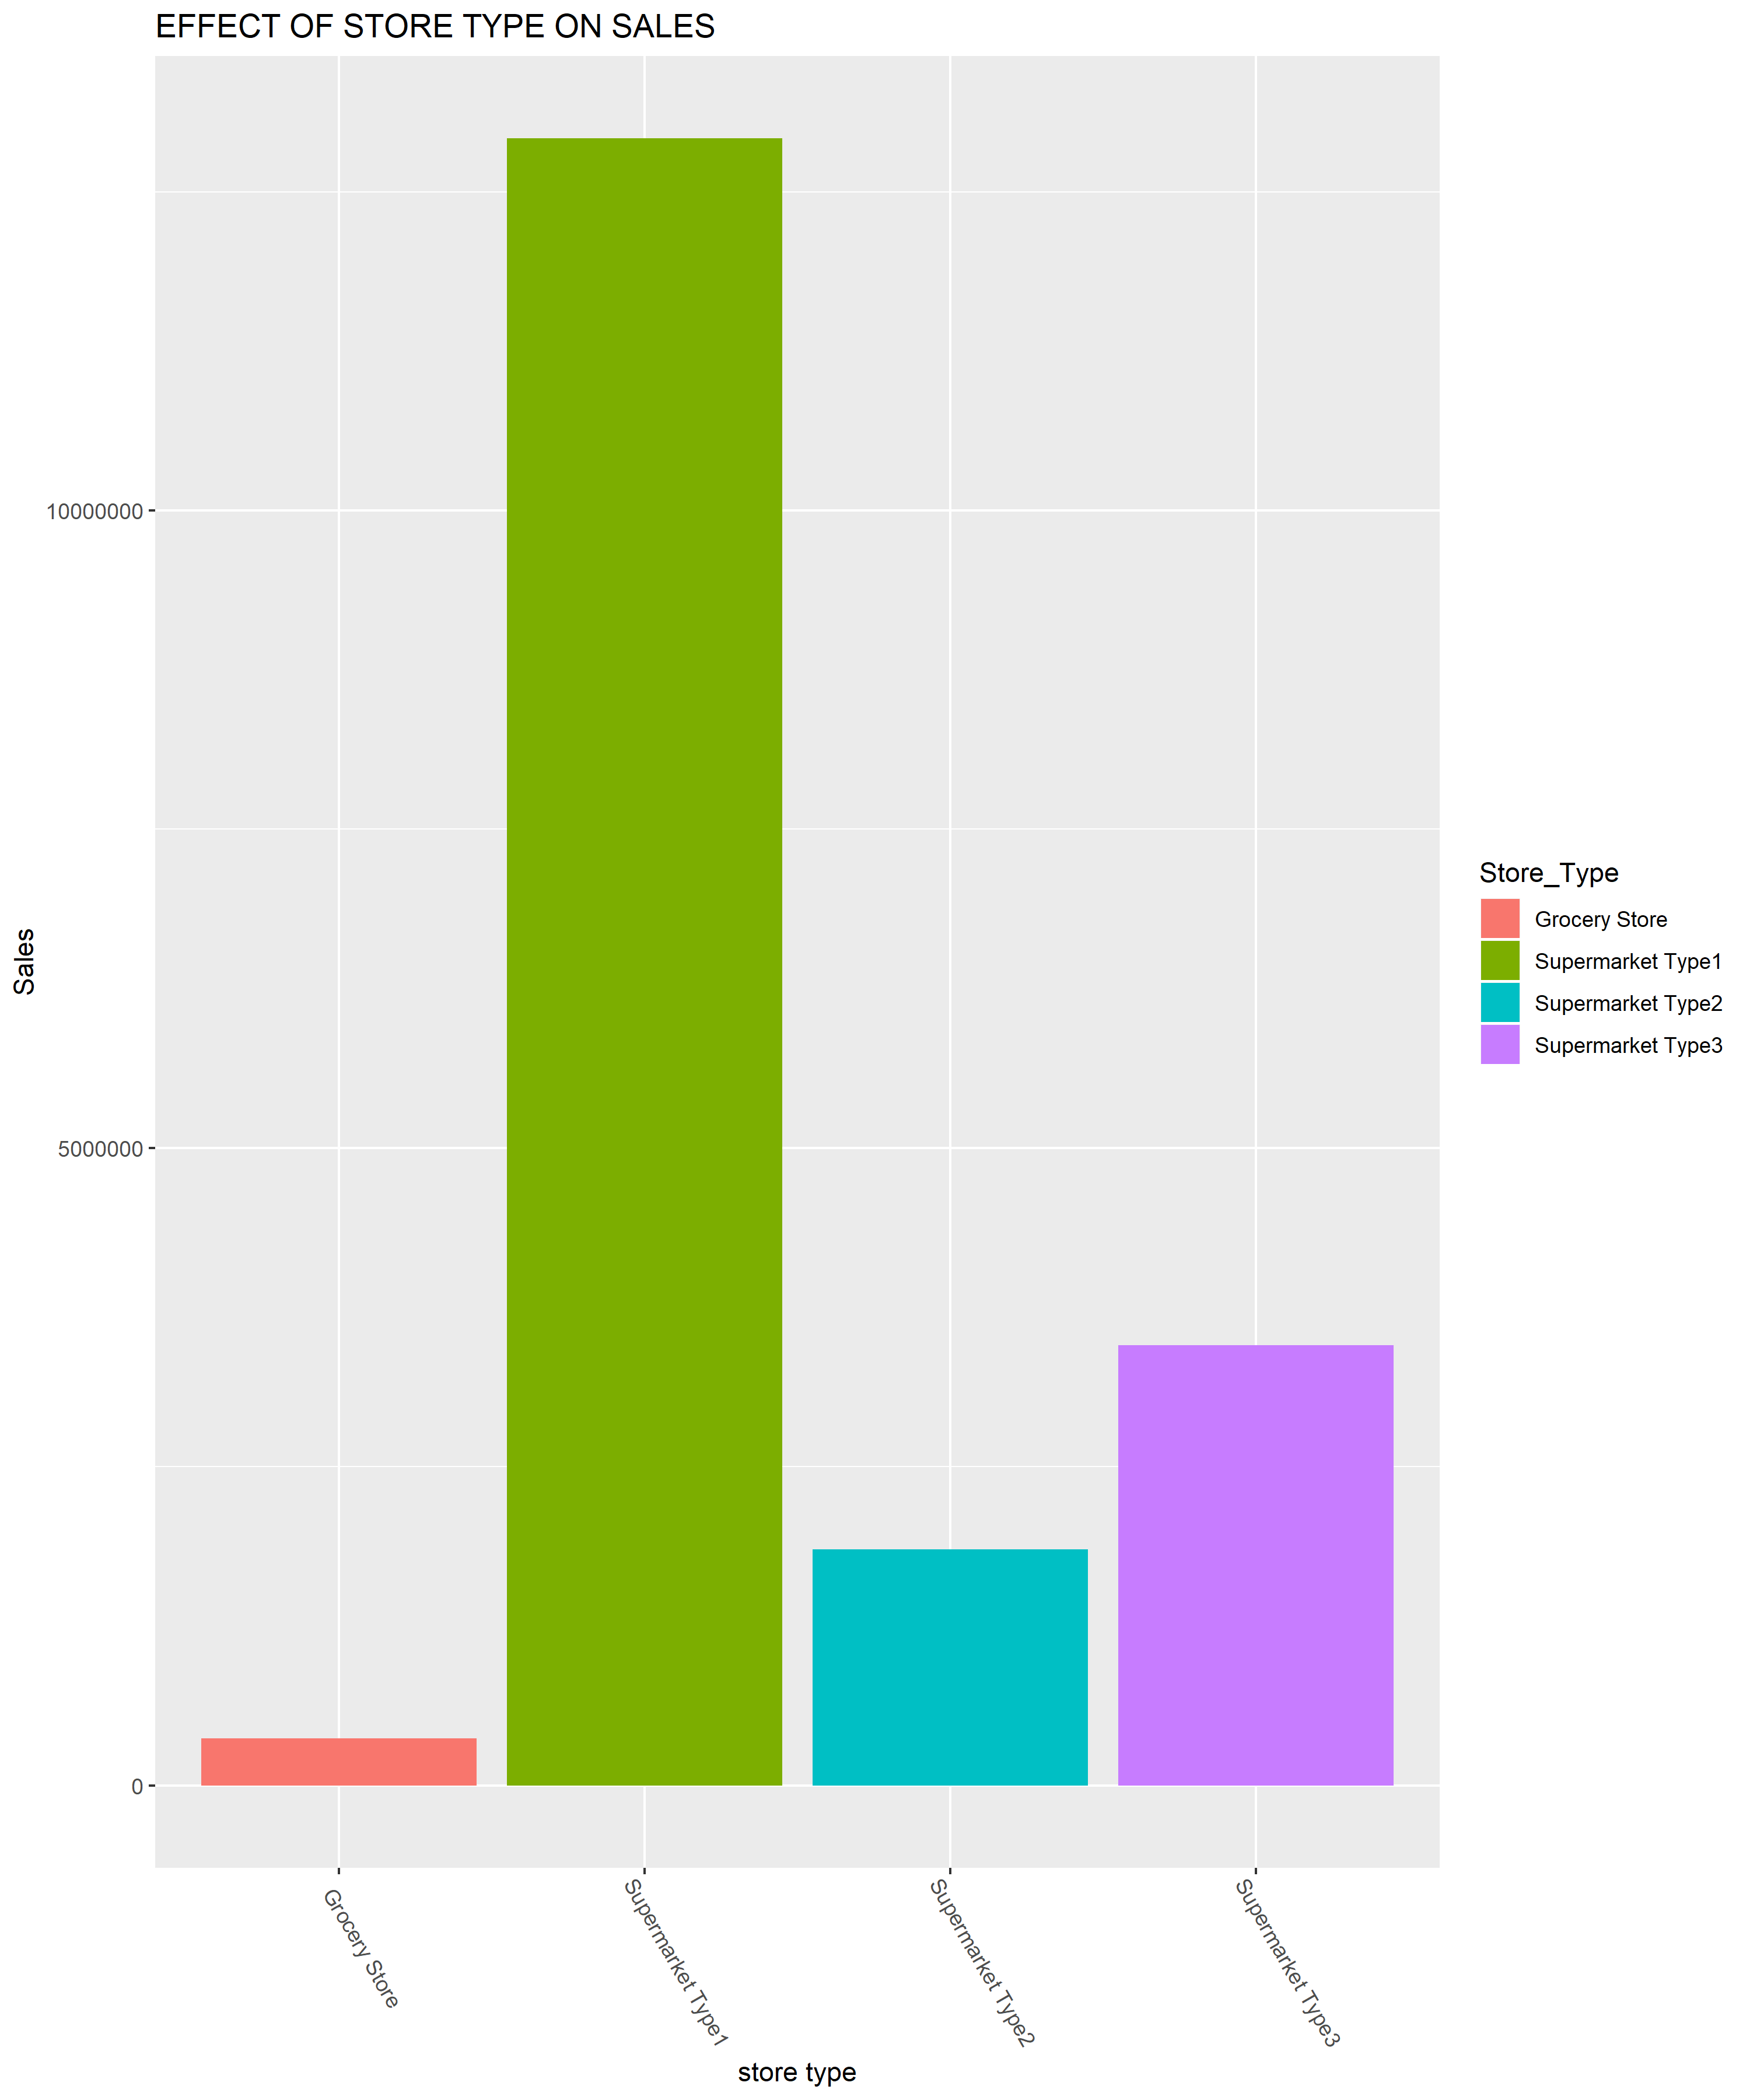

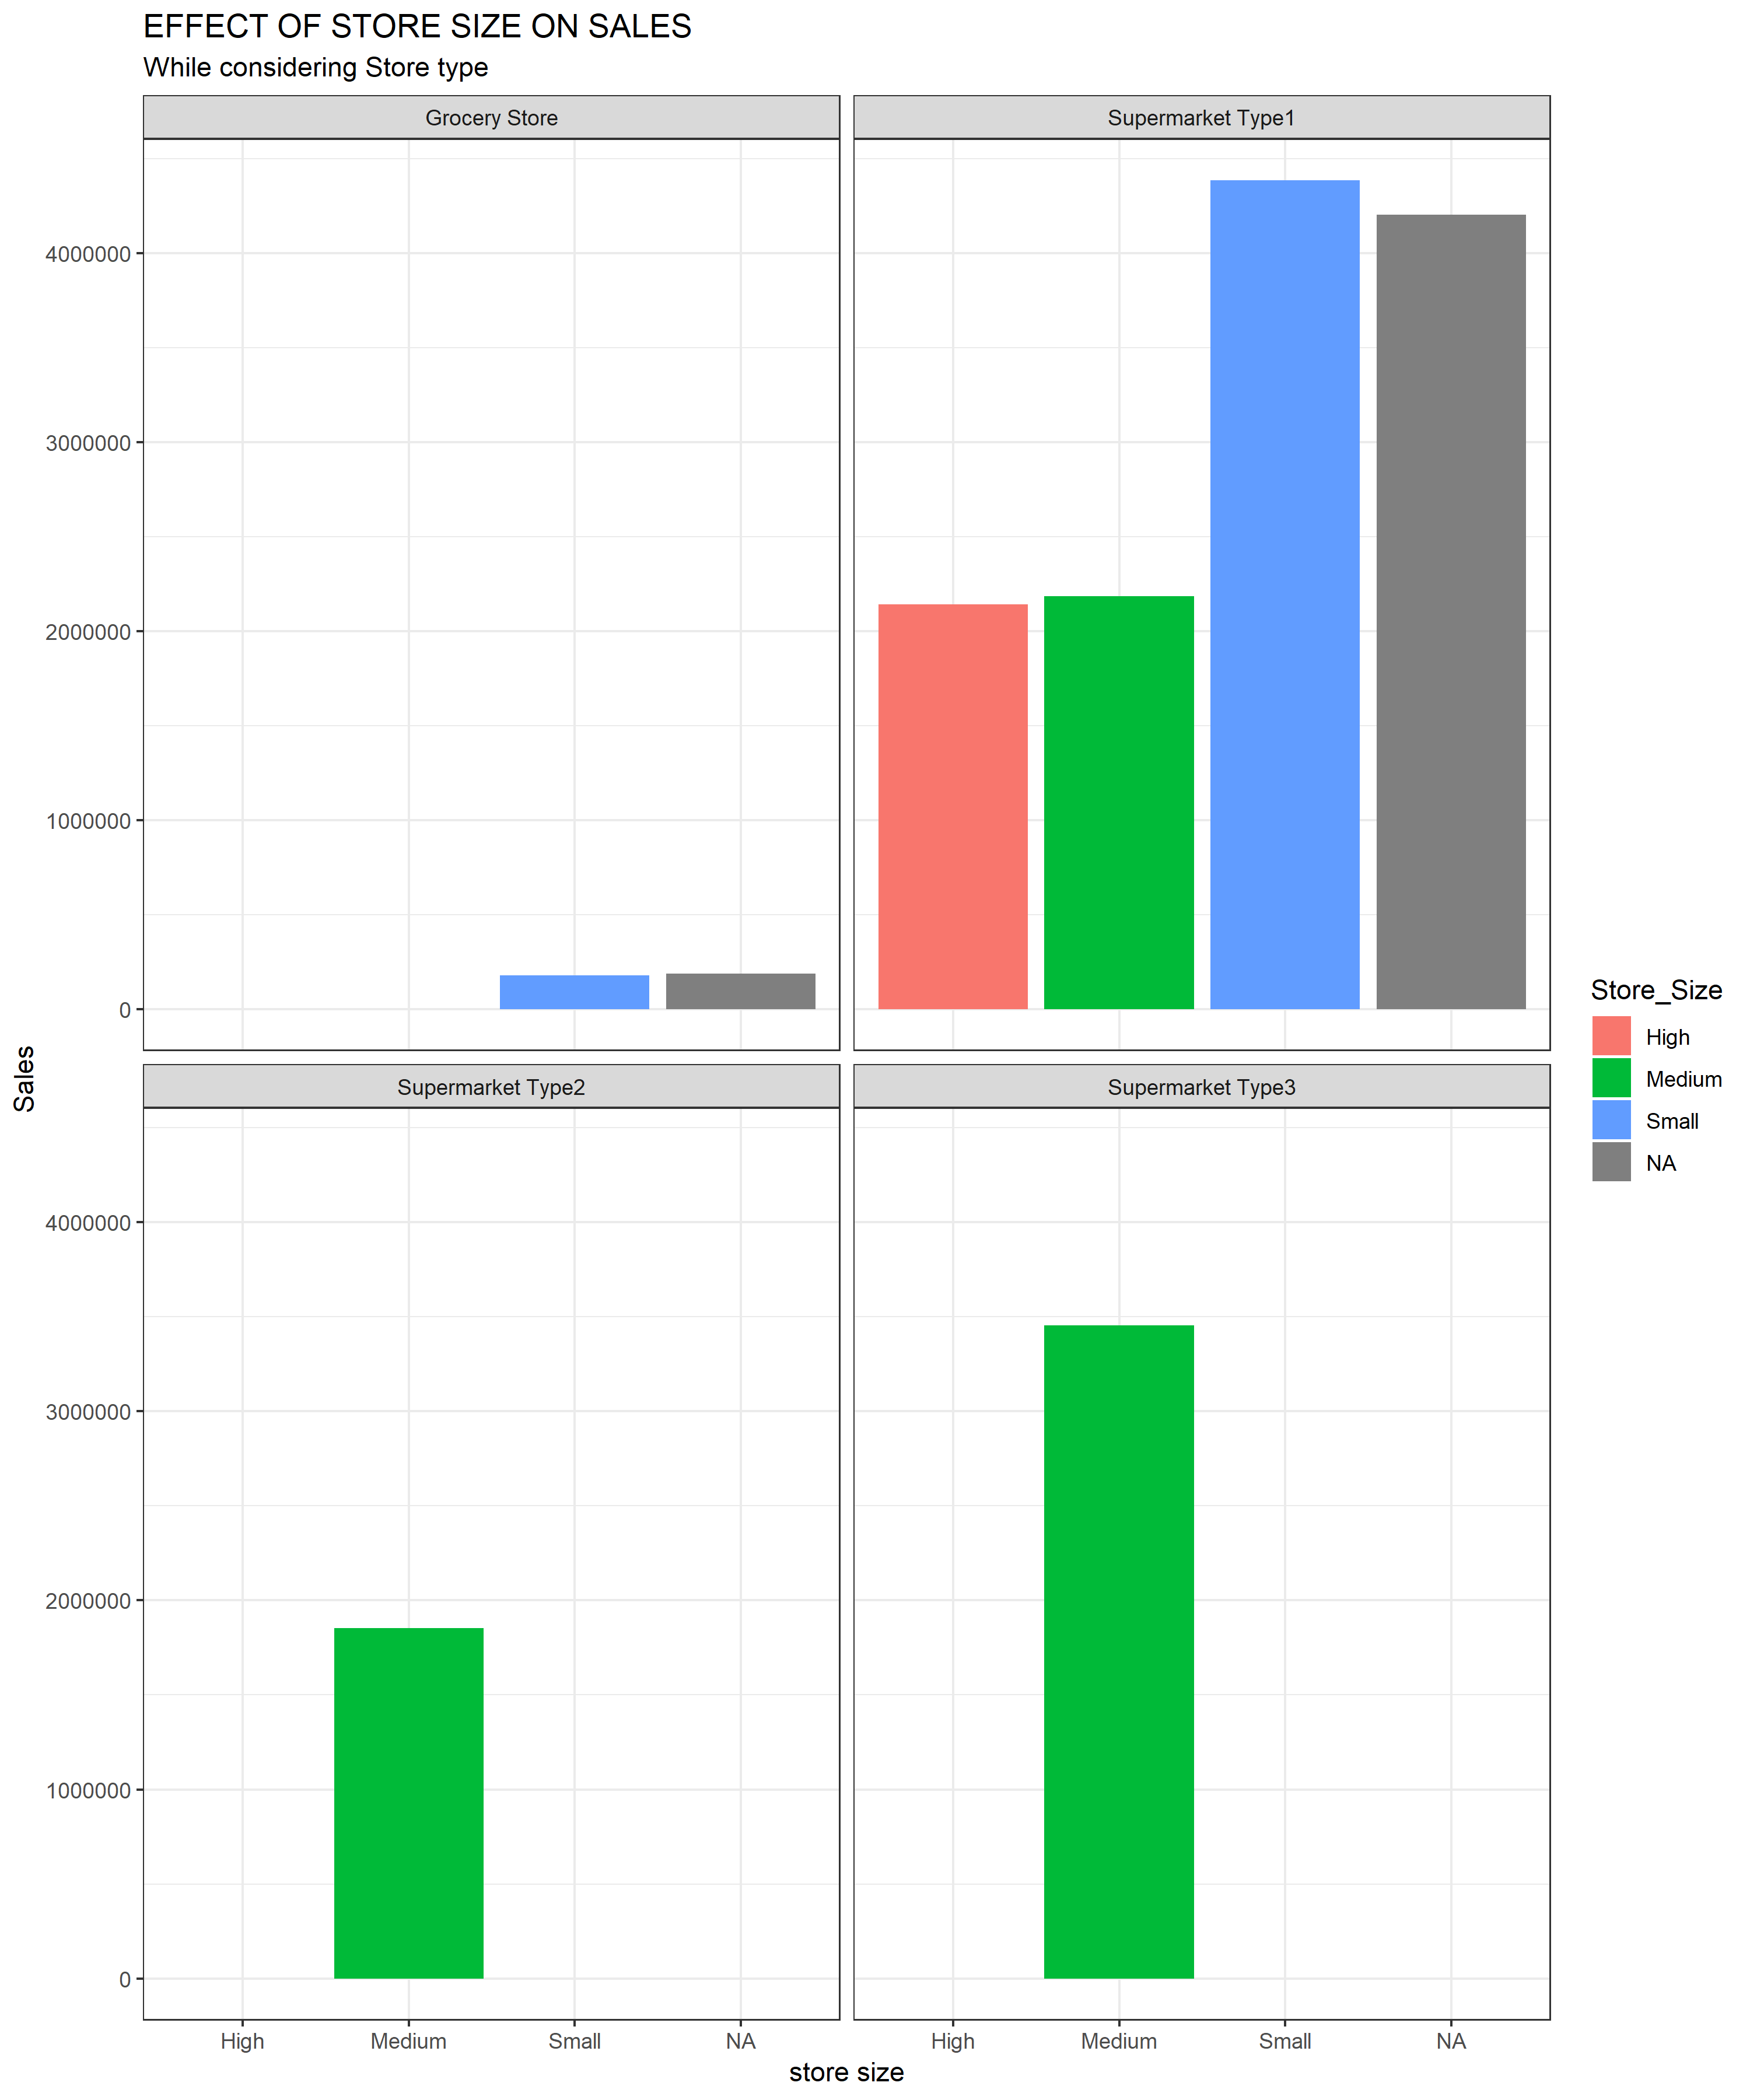

It can be observed that supermarket type1 has the highest sales but this is because it is a combination of six stores.     
The boxplot for supermarket type 3 is seen to be the widest indicating that the sales in this store type are highly volatile as compared to the others while sales in groceries are said to be the most constant when compared to the other store types. The variations in sales across the store types indicates that the parameter is important in predicting the sales.


### Store Establishment Year and item store sales

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

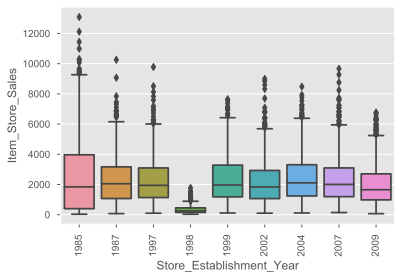

In [80]:
sns.boxplot(x='Store_Establishment_Year', y='Item_Store_Sales', data=train_bundas)
plt.xticks(rotation=90)

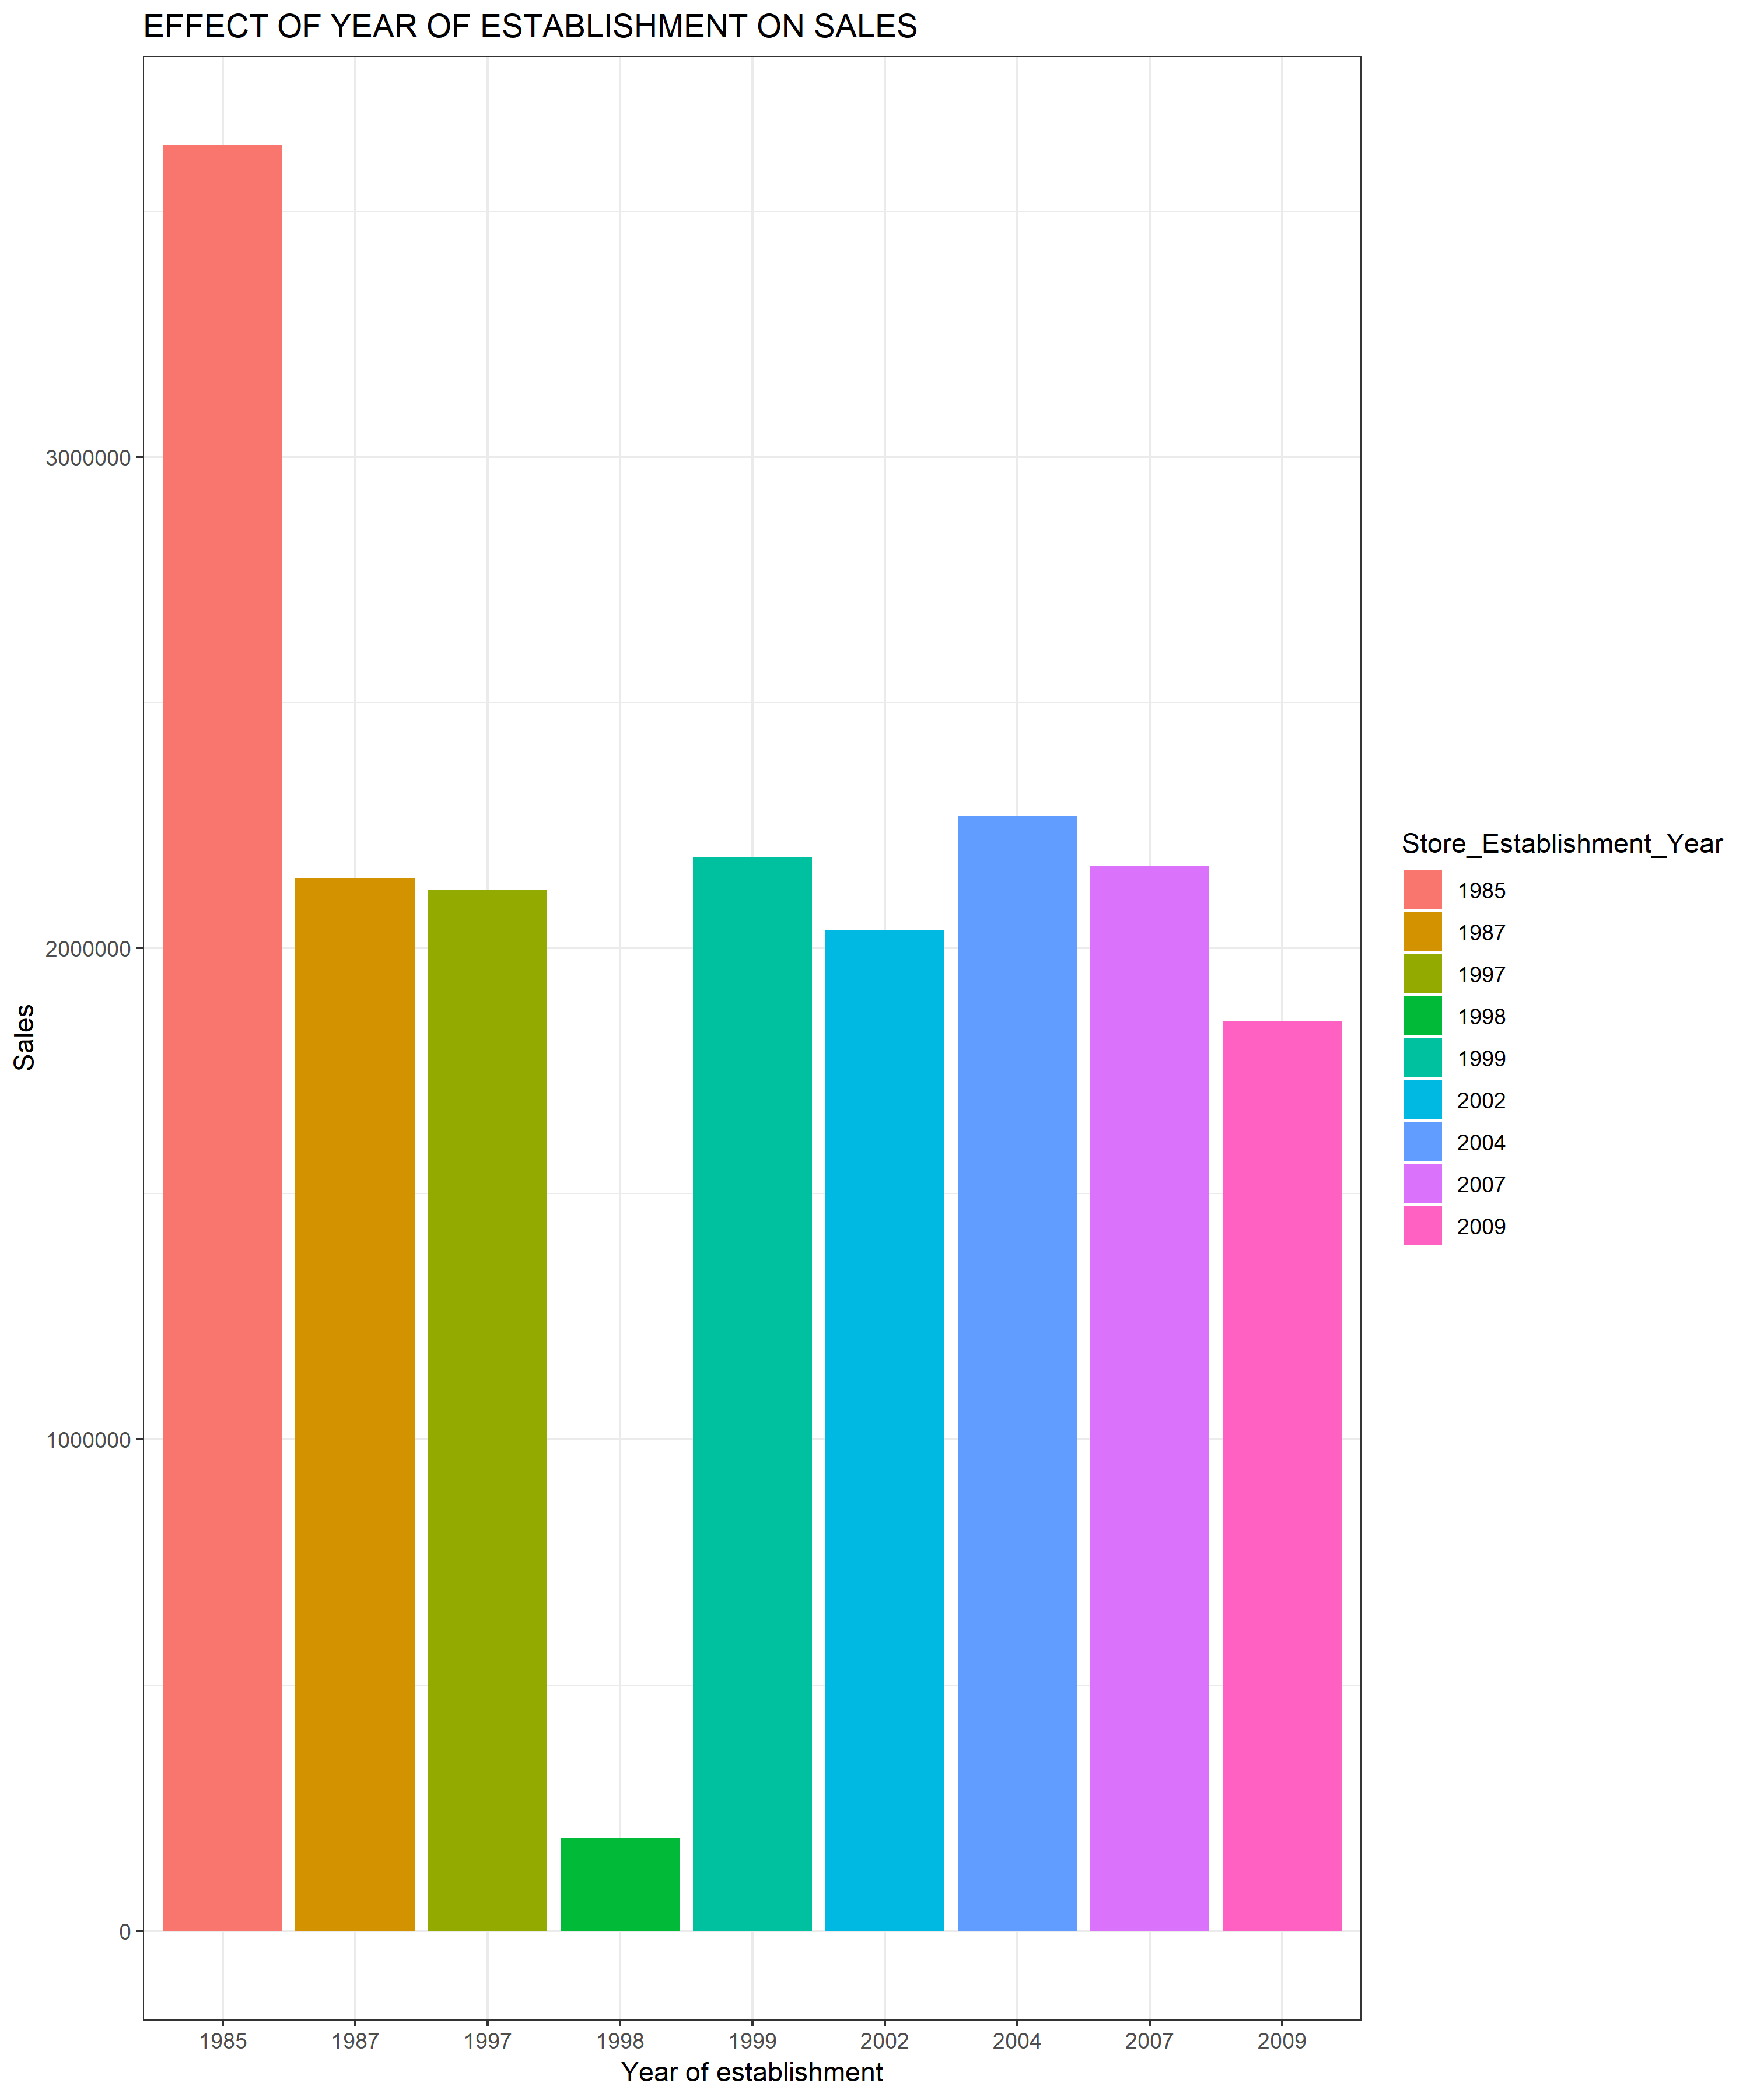

It can be observed that store established1985 has the highest sales while the store established in 1998 had the least sales but all the others are seen to have almost the same sales amount.       
It can also be observed that the store established in 1985 have the widest boxplot an indication that the sales are highly volatile while the store established in 1998 has the smallest boxplot and can be said to have almost constant sale amounts as compared to the others.     
The store establishment year column is seen to be an important parameter in determining the sales amount.   


### Max price and Item store sales

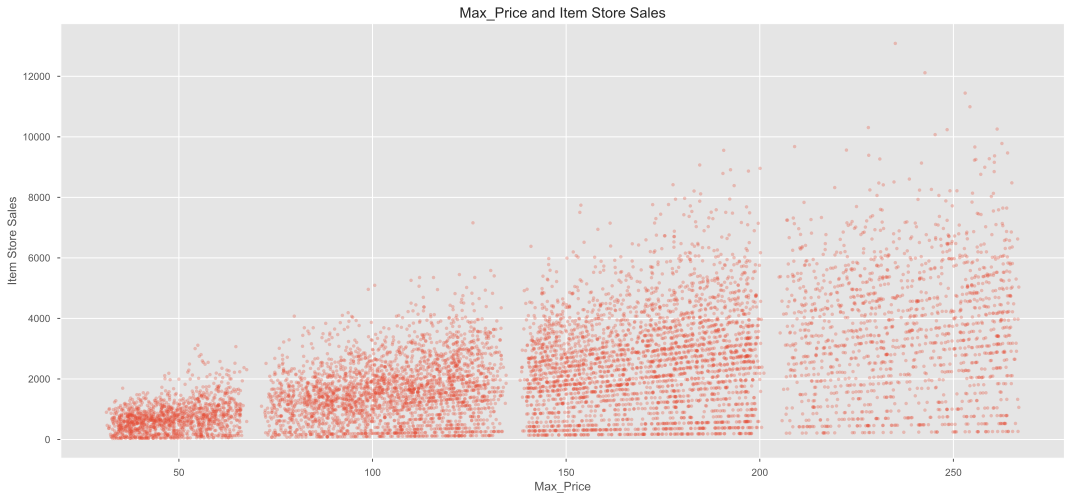

In [81]:
plt.figure(figsize=(18,8))
plt.xlabel("Max_Price")
plt.ylabel("Item Store Sales")
plt.title("Max_Price and Item Store Sales")
plt.plot(train_bundas.Max_Price, train_bundas["Item_Store_Sales"],'.', alpha = 0.3)

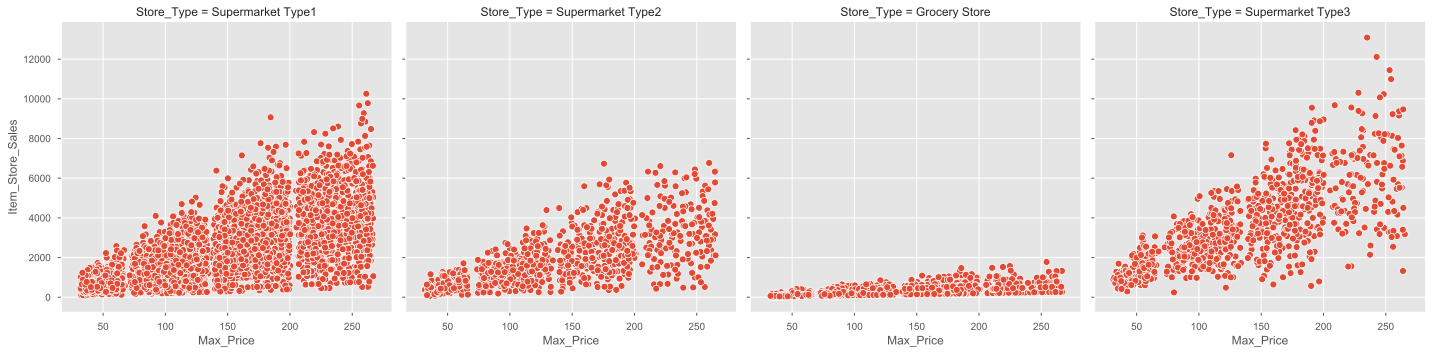

In [82]:
sns.relplot(x='Max_Price',y='Item_Store_Sales',col='Store_Type',data=train_bundas)

From the scatter plot it can be observed that as the maximum price increases so does the sales amount but the concentration of sales decreases.    
This is challenged when we consider the store type it can be observed that in the case of grocery stores even with an increase in maximum price the concentration and value of sales almost remains constant unlike in the case of all the other store types where the value and concentration of sales is seen to increase, well apart from the supermarket type 1 whose concentration is almost unchanged across the different maximum prices.   
It can be concluded that the maximum price is a helpful parameter in determining the sales amount.     


## Feature engineering

# Dealing with missing data
  
We discovered there are blanks in the weight (1463) collum and the store size (2410).  
After a deeper analysis we discovered that some of the missing entries for weights collumn have the same item id as the products with the weight entries hence we decided to fill up the entries with blanks considering their item id. 
   

### Loading the data set and needed packages

#### For this part we used R and the code is as seen below :


```
setwd("c:/Users/user/Desktop/Bundas")
df<-read.csv("bundas_train.csv",na.strings=c(" ","NA",""))
ts<-read.csv("bundas_test.csv",na.strings=c(" ","NA",""))
library("dplyr");library("plyr")

colSums(is.na(df))

df$tracker<-1:nrow(df)
```

#### getting columns with the weight entries
```
drna<-df[complete.cases(df$Weight),]

tra<-drna$tracker
```

### the entries without any weight entries
```
dropd<-df[-tra,]
```

### confirming the combined splits are the same as the original data
```
nrow(drna)+nrow(dropd)
nrow(df)


colSums(is.na(drna))

weigts<-drna %>% 
  group_by(Item_ID,Weight) %>% 
  summarise(x=1)

colnames(weigts)<-c("Item_ID","Weight_al","x")
compwight<-left_join(dropd, weigts[,-3], by="Item_ID")

compwight$Weight<-compwight$Weight_al
```

### Only 4 entries remain without any entries in the weights columns
```
colSums(is.na((compwight)))
```

### combining the two to create a new data set
```
cmw_df<-rbind(drna,compwight[,-14])
```

## looking at the size column to determine way of replacing the blanks
```
stor<-cmw_df[complete.cases(cmw_df$Store_Size),]
instor<-cmw_df[complete.cases(cmw_df$Store_Size)==FALSE,]


nrow(stor)+nrow(instor)
nrow(df)

totll<-sum(df$Item_Store_Sales)
```

#### Looking at the percentage of sales accounted for by all the stores.
This is so as to help us see what effect dropping the rows without entries will have.

```
aSTORES<-df %>% 
  group_by(df$Store_ID,df$Store_Establishment_Year,df$Store_Type,df$Store_Location_Type) %>% 
  summarise(total=sum(Item_Store_Sales)) %>% 
  mutate(per=(total/aass)*100)

```

Looking at the percentage of sales accounted for by the three stores with missing size
```
bSTORES<-instor %>% 
  group_by(Store_ID,Store_Establishment_Year,Store_Type,Store_Location_Type) %>% 
  summarise(x=sum(Item_Store_Sales)) %>% 
  mutate(per=(x/aass)*100)
```

Looking at the percentage of sales accounted for by the sevenstores with the size indicated
```
cSTORES<-stor %>% 
  group_by(Store_ID,Store_Establishment_Year,Store_Type,Store_Location_Type,Store_Size) %>% 
  summarise(total=sum(Item_Store_Sales)) %>% 
  mutate(per=(total/aass)*100)
```

we decideD to drop the empty rows, in doing so we loose 28.32% of our original test data which accounts for 23% of our sales 

```
fin_df<-cmw_df[complete.cases(cmw_df),]
sum(bSTORES$per)
(1-nrow(fin_df)/nrow(df))*100

write.csv(fin_df,"comp_bundas_train.csv")
```


###### Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types

###### encode categorival variables

In [13]:
# Combine the one hot encoded columns with df_con_enc
modDfenc = pd.concat([modDf, 
                        FatContent_one_hot, 
                        Category_one_hot, 
                        Store_Size_one_hot,
                        Store_Location_Type_one_hot, 
                        Store_Type_one_hot, 
                        Store_ID_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
modDfenc = modDfenc.drop(['FatContent','Category','Store_Size','Store_Location_Type','Store_Type','Store_ID'], axis=1)

In [ ]:
# One hot encode the categorical columns
FatContent_one_hot = pd.get_dummies(modDf['FatContent'], 
                                     prefix='FatContent')

Category_one_hot = pd.get_dummies(modDf['Category'], 
                                prefix='Category')

Store_Size_one_hot = pd.get_dummies(modDf['Store_Size'], 
                                   prefix='Store_Size')

# One hot encode the categorical columns
Store_Location_Type_one_hot = pd.get_dummies(modDf['Store_Location_Type'], 
                                     prefix='Store_Location_Type')

Store_Type_one_hot = pd.get_dummies(modDf['Store_Type'], 
                                prefix='Store_Type')

Store_ID_one_hot = pd.get_dummies(modDf['Store_ID'], 
                                   prefix='Store_ID')


In [14]:
# Let's look at df_con_enc
modDfenc.head(20)

Item_ID  Weight  Visibility  Max_Price  Store_Establishment_Year  \
0    FDA15    9.30        0.02     249.81                      1999   
1    DRC01    5.92        0.02      48.27                      2009   
2    FDN15   17.50        0.02     141.62                      1999   
3    NCD19    8.93        0.00      53.86                      1987   
4    FDP36   10.39        0.00      51.40                      2009   
5    FDO10   13.65        0.01      57.66                      1987   
6    FDY07   11.80        0.00      45.54                      1999   
7    FDA03   18.50        0.05     144.11                      1997   
8    FDX32   15.10        0.10     145.48                      1999   
9    FDS46   17.60        0.05     119.68                      1997   
10   FDF32   16.35        0.07     196.44                      1987   
11   FDP49    9.00        0.07      56.36                      1997   
12   NCB42   11.80        0.01     115.35                      2009   
13   FDP49    9.00        0.07      54.36                      1999   
14   FDU02   13.35        0.10     230.54                      2004   
15   FDN22   18.85        0.14     250.87                      1987   
16   NCB30   14.60        0.03     196.51                      2004   
17   FDR28   13.85        0.03     165.02                      1997   
18   FDV10    7.64        0.07      42.31                      2004   
19   DRJ59   11.65        0.02      39.12                      1987   

    Item_Store_Sales  FatContent_LF  FatContent_Low Fat  FatContent_Regular  \
0           3,735.14              0                   1                   0   
1             443.42              0                   0                   1   
2           2,097.27              0                   1                   0   
3             994.71              0                   1                   0   
4             556.61              0                   0                   1   
5             343.55              0                   0                   1   
6           1,516.03              0                   1                   0   
7           2,187.15              0                   0                   1   
8           1,589.26              0                   0                   1   
9           2,145.21              0                   0                   1   
10          1,977.43              0                   1                   0   
11          1,547.32              0                   0                   1   
12          1,621.89              0                   1                   0   
13            718.40              0                   0                   1   
14          2,748.42              0                   1                   0   
15          3,775.09              0                   0                   1   
16          1,587.27              0                   1                   0   
17          4,078.03              0                   0                   1   
18          1,065.28              0                   0                   1   
19            308.93              0                   0                   0   

    FatContent_low fat  FatContent_reg  Category_Baking Goods  \
0                    0               0                      0   
1                    0               0                      0   
2                    0               0                      0   
3                    0               0                      0   
4                    0               0                      1   
5                    0               0                      0   
6                    0               0                      0   
7                    0               0                      0   
8                    0               0                      0   
9                    0               0                      0   
10                   0               0                      0   
11                   0               0                      0   
12    

##### export one hot encoded training data

In [18]:
selected_df.to_csv(home_folder + 'train_modified.csv', index=False)

